In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

1. Loading the data into the data frame

In [2]:
df=pd.read_csv("co2_emissions.csv")
df.head(3)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136


In [3]:
df.tail()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS,Z,12.2,8.7,10.7,26,248


2. Checking the types of data




In [4]:
# dtype will identify the data type of the data
df.dtypes

make                               object
model                              object
vehicle_class                      object
engine_size                       float64
cylinders                           int64
transmission                       object
fuel_type                          object
fuel_consumption_city             float64
fuel_consumption_hwy              float64
fuel_consumption_comb(l/100km)    float64
fuel_consumption_comb(mpg)          int64
co2_emissions                       int64
dtype: object

1. There are total 7385 row and 12 columns.
2. We can see that there are total 7 columns with numerical values and other 5 have character values.
3. The columns Engine Size, Cylinders, Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km), Fuel Consumption Comb (mpg) and CO2 Emissions are numerical and continuous in nature.
4. The columns Make, Model, Vehicle Class, Transmission and Fuel Type are categorical in nature.

In [5]:
# Checking for the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [6]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
make,7385,42,FORD,628
model,7385,2053,F-150 FFV 4X4,32
vehicle_class,7385,16,SUV - SMALL,1217
transmission,7385,5,AS,3127
fuel_type,7385,5,X,3637


In [7]:
#checking the shape of the data set
df.shape

(7385, 12)

shape()

The shape attribute in pandas is used to get the dimensions of a DataFrame. It returns a tuple representing the number of rows and columns in the DataFrame. The first element of the tuple is the number of rows, and the second element is the number of columns.

1)In this data we have 7385 rows and 12 cols.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_consumption_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_consumption_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_consumption_comb(l/100km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
fuel_consumption_comb(mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2_emissions,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


describe()

Count: Number of non-null entries.

Mean: Mean or average value.

std: Standard deviation, a measure of the amount of variation or dispersion in a set of values.

min: Minimum value.

25%: First quartile (Q1), the value below which 25% of the data falls.

50%: Median or second quartile (Q2), the value below which 50% of the data falls.

75%: Third quartile (Q3), the value below which 75% of the data falls.
max: Maximum value.


In [9]:
# checking the duplicate value
duplicate = df.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 1112 duplicated rows in the data


In [10]:
# we have to remove 1112 duplicates rows in our data

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.reset_index(inplace=True, drop=True)

In [13]:
# After removing the duplicate values
# we have 6273 rows and 12 cols
df.shape

(6273, 12)

Visualization

Brands of Cars




In [14]:
df['make'] = df['make'].replace(['BUGATTI', 'PORSCHE', 'MASERATI', 'ASTON MARTIN', 'LAMBORGHINI', 'JAGUAR','SRT'], 'Sports')
df['make'] = df['make'].replace(['ALFA ROMEO', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHRYSLER', 'DODGE', 'GMC','INFINITI', 'JEEP', 'LAND ROVER', 'LEXUS', 'MERCEDES-BENZ','MINI', 'SMART', 'VOLVO'],'Premium')
df['make'] = df['make'].replace(['ACURA', 'BENTLEY', 'LINCOLN', 'ROLLS-ROYCE',  'GENESIS'], 'Luxury')
df['make'] = df['make'].replace(['CHEVROLET', 'FIAT', 'FORD', 'KIA', 'HONDA', 'HYUNDAI', 'MAZDA', 'MITSUBISHI','NISSAN', 'RAM', 'SCION', 'SUBARU', 'TOYOTA','VOLKSWAGEN'],'General')

In [15]:
print("We have total",len(df['make'].unique()),"Car Companies Data")
df_brand = df['make'].value_counts().reset_index().rename(columns={'index':'make','make':'Count'})
df_brand.head(10)


We have total 4 Car Companies Data


,make,Count
0,General,2767
1,Premium,2731
2,Sports,546
3,Luxury,229


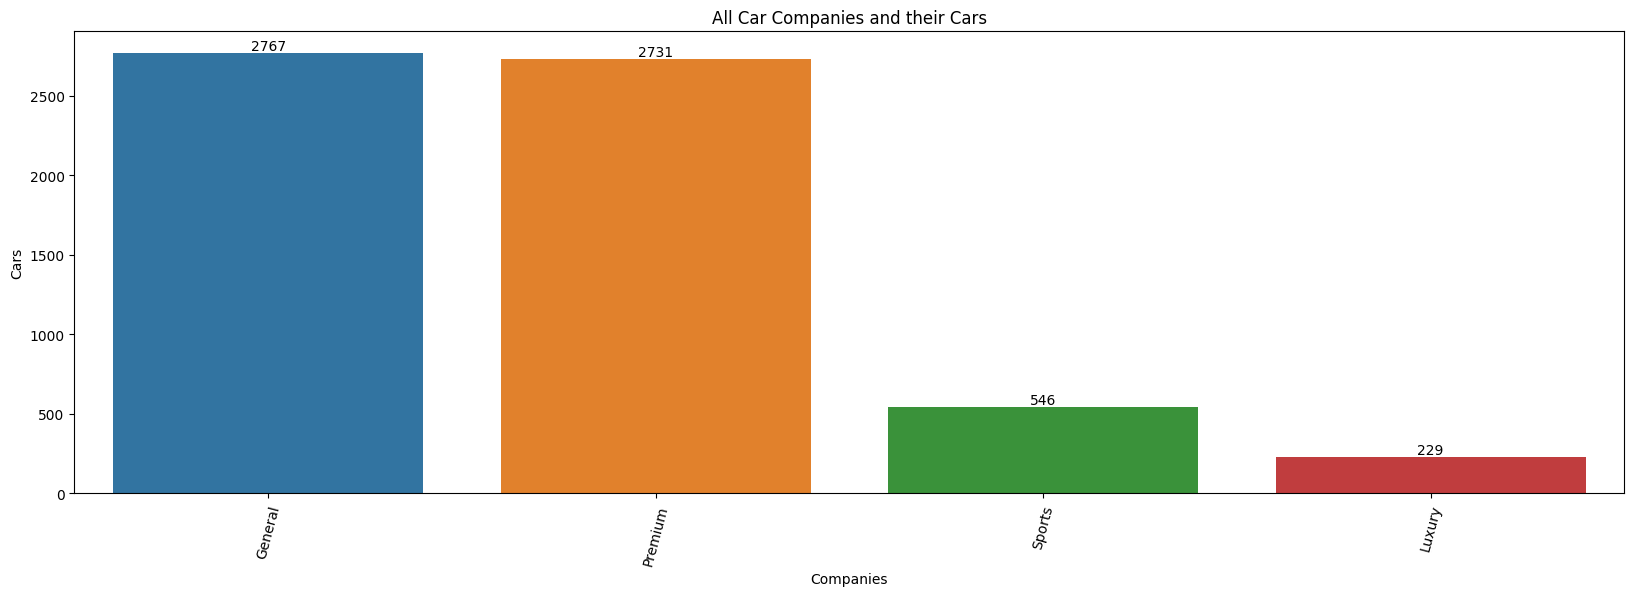

In [16]:
plt.figure(figsize=(20,6))
figure1 = sns.barplot(data = df_brand, x = "make",  y= "Count")
plt.xticks(rotation = 75)
plt.title("All Car Companies and their Cars")
plt.xlabel("Companies")
plt.ylabel("Cars")
plt.bar_label(figure1.containers[0])
plt.show()

Models of cars


In [17]:
print("We have total",len(df['model'].unique()),"Car Models")
df_model = df['model'].value_counts().reset_index().rename(columns={'index':'model','model':'Count'})[:25]
df_model.head(10)

We have total 2053 Car Models


,model,Count
0,F-150 FFV,32
1,F-150 FFV 4X4,31
2,MUSTANG,26
3,FOCUS FFV,24
4,F-150 4X4,20
5,F-150,19
6,SONIC 5,18
7,ATS,18
8,JETTA,18
9,COMPASS,18


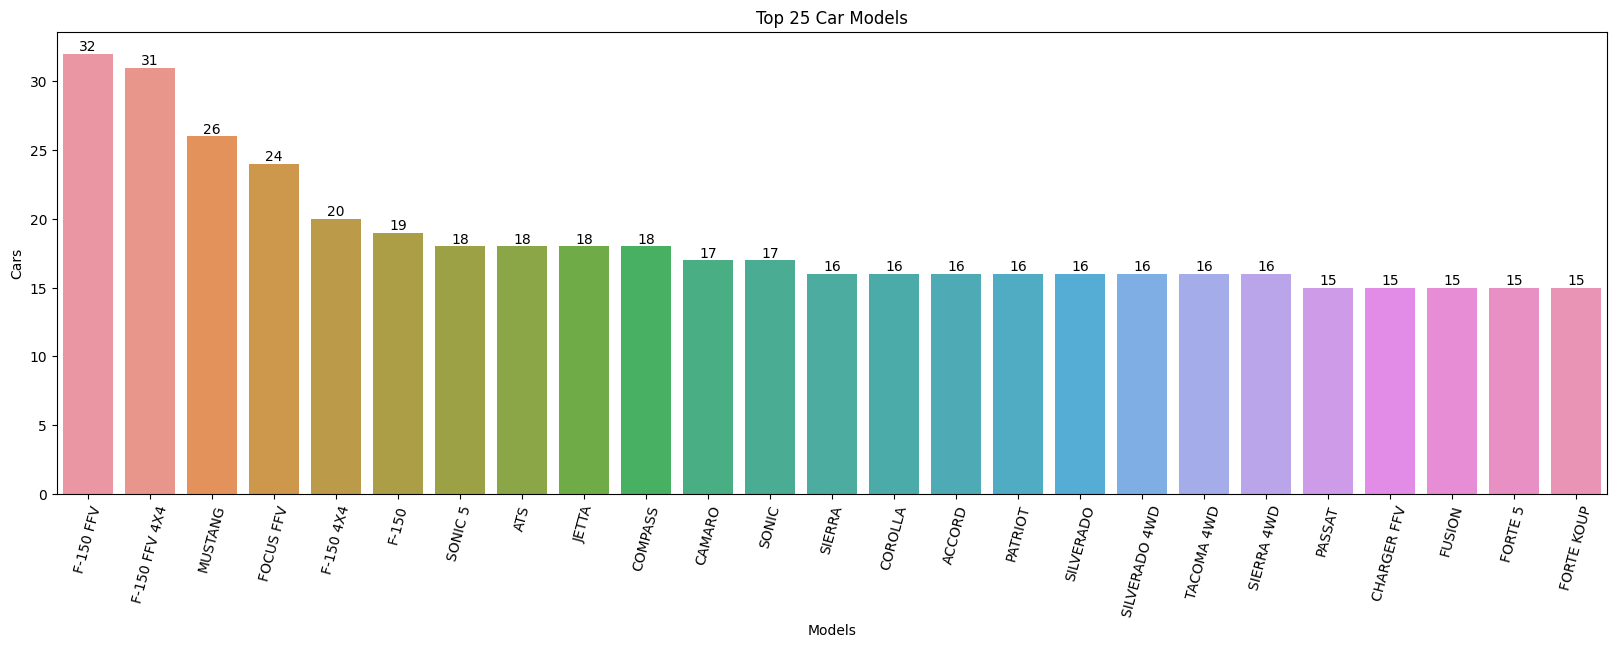

In [18]:
plt.figure(figsize=(20,6))
figure2 = sns.barplot(data = df_model, x = "model",  y= "Count")
plt.xticks(rotation = 75)
plt.title("Top 25 Car Models")
plt.xlabel("Models")
plt.ylabel("Cars")
plt.bar_label(figure2.containers[0])
plt.show()

Vehicle Class

In [19]:
df['vehicle_class'] = df['vehicle_class'].replace(['COMPACT', 'MINICOMPACT', 'SUBCOMPACT'], 'Hatchback')
df['vehicle_class'] = df['vehicle_class'].replace(['MID-SIZE', 'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL', 'STATION WAGON - MID-SIZE'],'Sedan')
df['vehicle_class'] = df['vehicle_class'].replace(['SUV - SMALL', 'SUV - STANDARD', 'MINIVAN'],  'SUV')
df['vehicle_class'] = df['vehicle_class'].replace(['VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE', 'PICKUP TRUCK - SMALL'], 'Truck')

In [20]:
print("We have total",len(df['vehicle_class'].unique()),"Vehicle Class")
df_vehicle_class = df['vehicle_class'].value_counts().reset_index().rename(columns={'index':'vehicle_class','vehicle_class':'Count'})
df_vehicle_class

We have total 4 Vehicle Class


,vehicle_class,Count
0,Sedan,2127
1,Hatchback,1708
2,SUV,1678
3,Truck,760


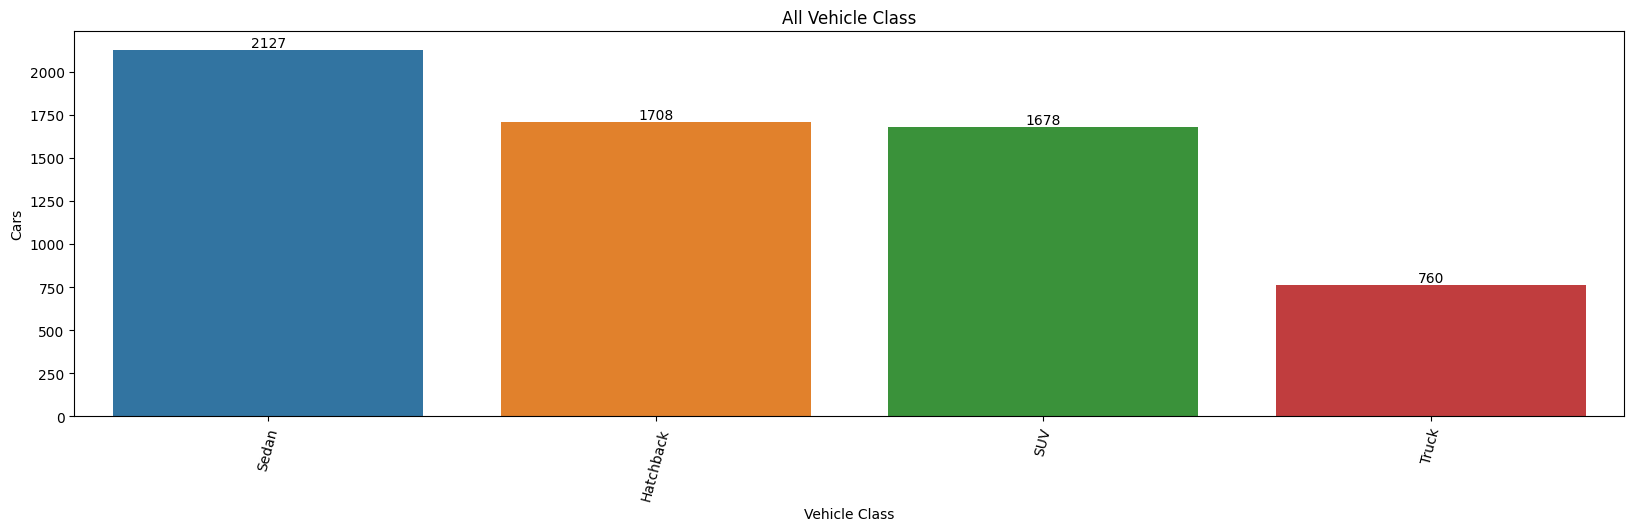

In [21]:
plt.figure(figsize=(20,5))
figure3 = sns.barplot(data = df_vehicle_class, x = "vehicle_class",  y= "Count")
plt.xticks(rotation = 75)
plt.title("All Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Cars")
plt.bar_label(figure3.containers[0])
plt.show()

Engine Sizes of cars

In [22]:
print("We have total",len(df['engine_size'].unique()),"Types of Engine Size")
df_engine_size = df['engine_size'].value_counts().reset_index().rename(columns={'index':'engine_size','engine_size':'Count'})
df_engine_size.head(10)

We have total 51 Types of Engine Size


,engine_size,Count
0,2.0,1260
1,3.0,687
2,3.6,433
3,3.5,431
4,2.5,353
5,2.4,287
6,1.6,272
7,5.3,240
8,1.8,187
9,5.0,178


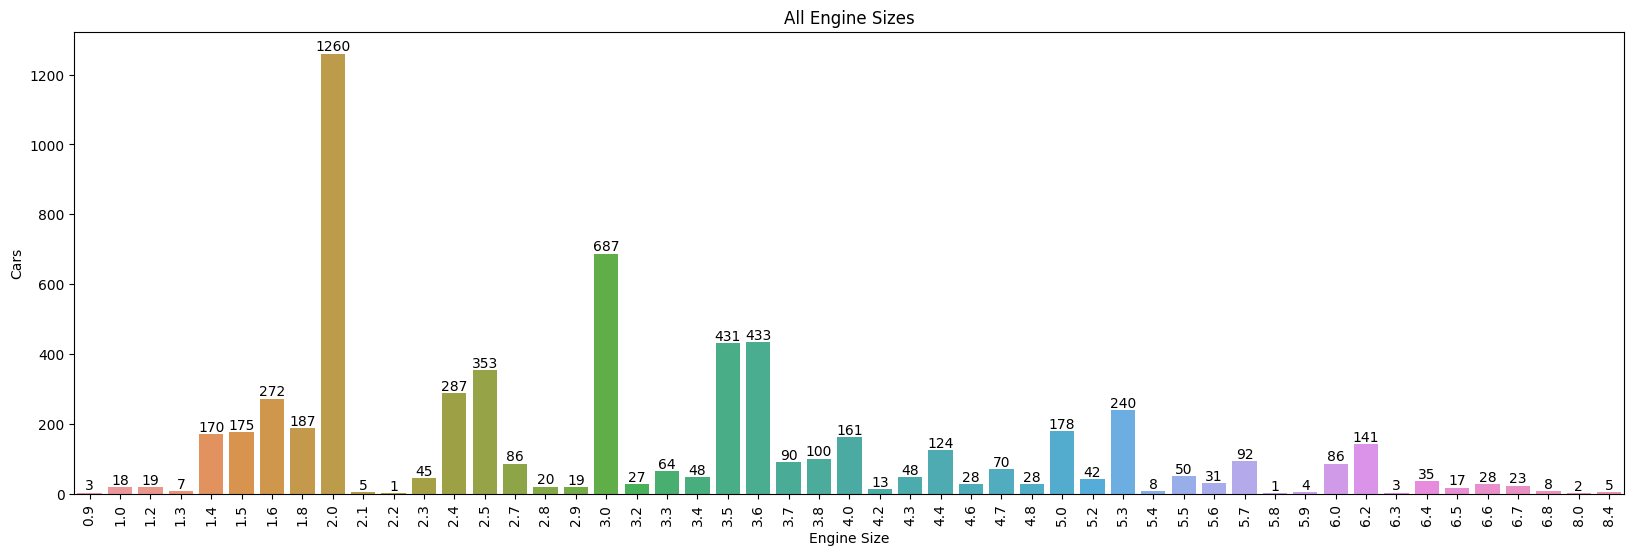

In [23]:
plt.figure(figsize=(20,6))
figure4 = sns.barplot(data = df_engine_size, x = "engine_size",  y= "Count")
plt.xticks(rotation = 90)
plt.title("All Engine Sizes")
plt.xlabel("Engine Size")
plt.ylabel("Cars")
plt.bar_label(figure4.containers[0])
plt.show()


In [24]:
# engine size 2 has the highest count.

Cylinders

In [25]:
print("We have total",len(df['cylinders'].unique()),"Types of Cylinders")
df_cylinders = df['cylinders'].value_counts().reset_index().rename(columns={'index':'cylinders','cylinders':'Count'})
df_cylinders

We have total 8 Types of Cylinders


,cylinders,Count
0,4,2741
1,6,2040
2,8,1201
3,12,135
4,3,88
5,10,40
6,5,26
7,16,2


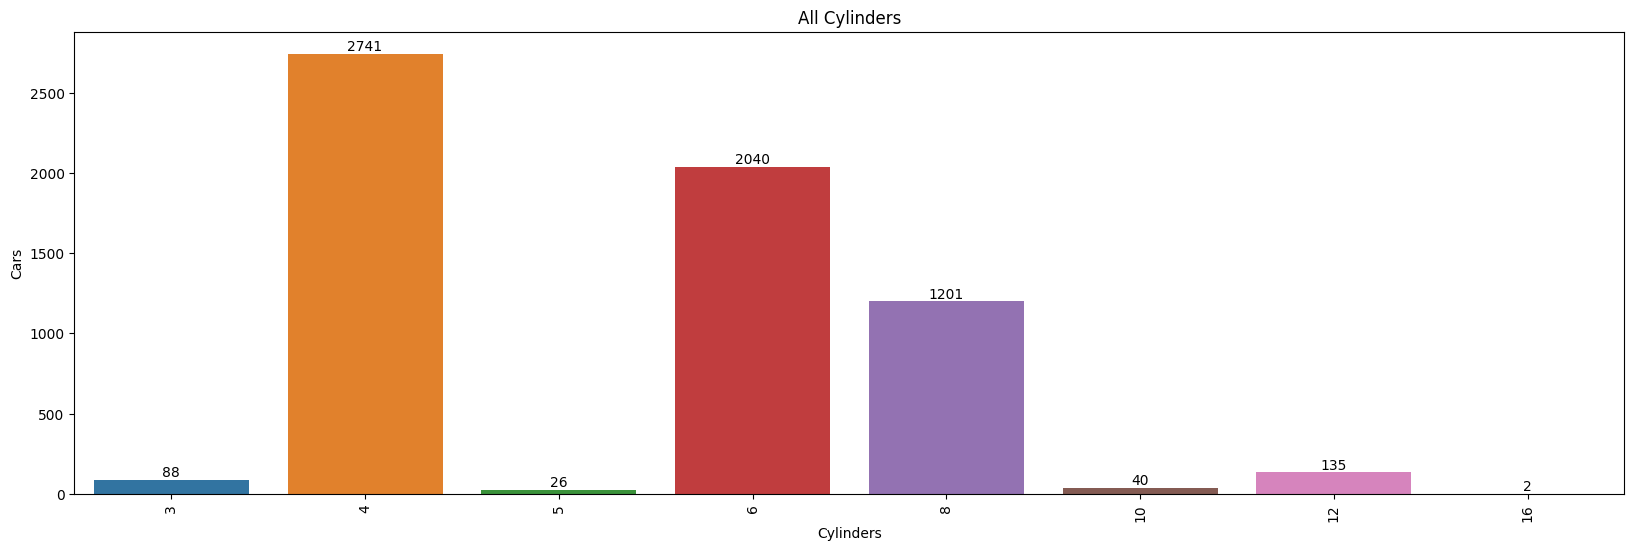

In [26]:
plt.figure(figsize=(20,6))
figure5 = sns.barplot(data = df_cylinders, x = "cylinders",  y= "Count")
plt.xticks(rotation = 90)
plt.title("All Cylinders")
plt.xlabel("Cylinders")
plt.ylabel("Cars")
plt.bar_label(figure5.containers[0])
plt.show()

In [27]:
# cylinders size 4 has the highest count.

Transmission of Cars

In [28]:
print("We have total",len(df['transmission'].unique()),"Types of transmission")
df_transmission = df['transmission'].value_counts().reset_index().rename(columns={'index':'transmission','transmission':'Count'})
df_transmission

We have total 5 Types of transmission


,transmission,Count
0,AS,2720
1,A,1536
2,M,1019
3,AM,540
4,AV,458


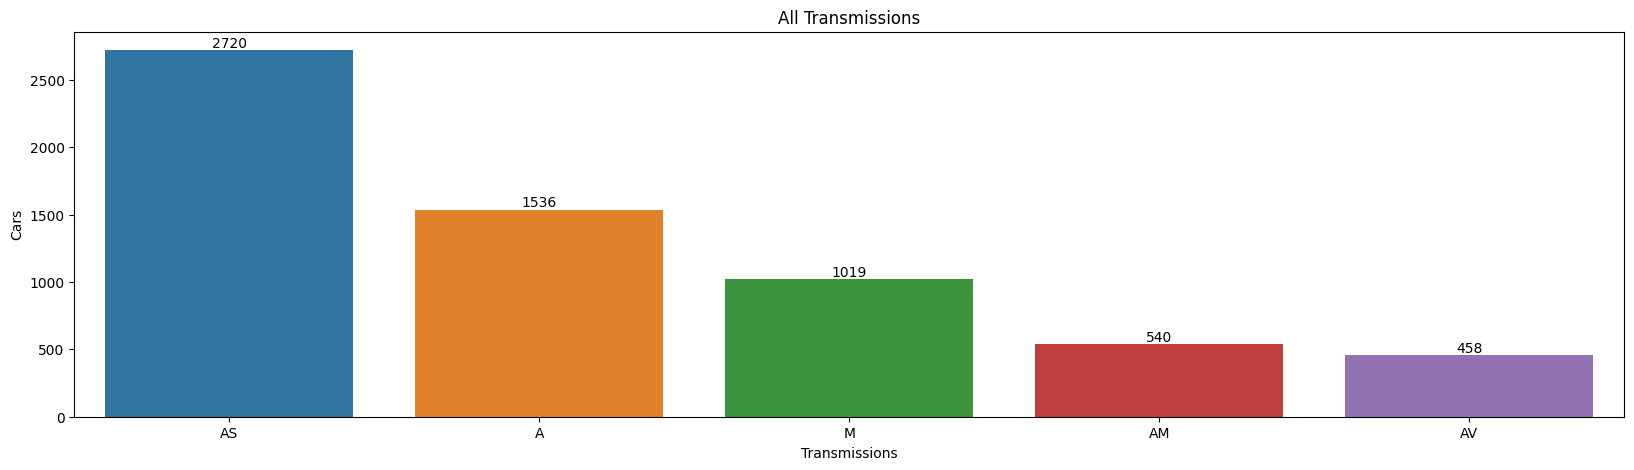

In [29]:
plt.figure(figsize=(20,5))
figure6 = sns.barplot(data = df_transmission, x = "transmission",  y= "Count")
plt.title("All Transmissions")
plt.xlabel("Transmissions")
plt.ylabel("Cars")
plt.bar_label(figure6.containers[0])
plt.show()

Fuel Type of Cars

fuel_type have 5 unique fuel they are

N = natural gas

E = ethanol

D = diesel

X = gasoline

Z = premium gasoline


In [30]:
df["fuel_type"] = np.where(df["fuel_type"]=="Z", "Premium Gasoline", df["fuel_type"])
df["fuel_type"] = np.where(df["fuel_type"]=="X", "Regular Gasoline", df["fuel_type"])
df["fuel_type"] = np.where(df["fuel_type"]=="D", "Diesel", df["fuel_type"])
df["fuel_type"] = np.where(df["fuel_type"]=="E", "Ethanol", df["fuel_type"])
df["fuel_type"] = np.where(df["fuel_type"]=="N", "Natural Gas", df["fuel_type"])

In [31]:
print("We have total",len(df['fuel_type'].unique()),"Types of fuel_type")
df_fuel_type = df['fuel_type'].value_counts().reset_index().rename(columns={'index':'fuel_type','fuel_type':'Count'})
df_fuel_type

We have total 5 Types of fuel_type


,fuel_type,Count
0,Regular Gasoline,3030
1,Premium Gasoline,2765
2,Ethanol,330
3,Diesel,147
4,Natural Gas,1


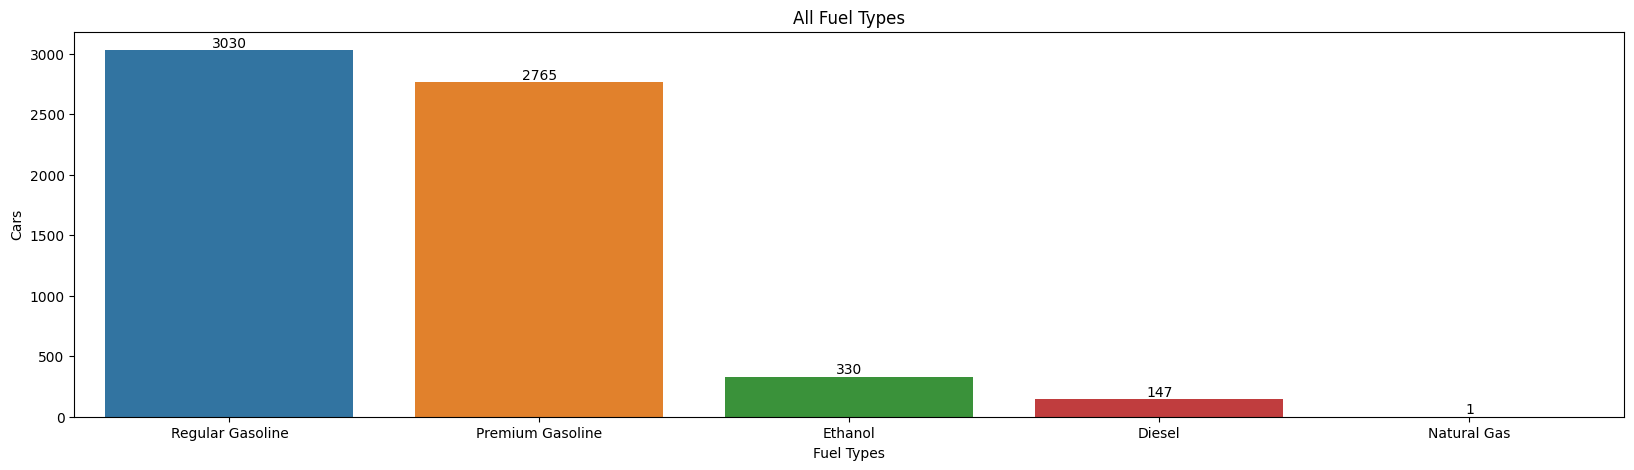

In [32]:
plt.figure(figsize=(20,5))
figure7 = sns.barplot(data = df_fuel_type, x = "fuel_type",  y= "Count")
plt.title("All Fuel Types")
plt.xlabel("Fuel Types")
plt.ylabel("Cars")
plt.bar_label(figure7.containers[0])
plt.show()

Variation in CO2 emissions with different features.

CO2 Emission with Brand

In [33]:
df_co2_make = df.groupby(['make'])['co2_emissions'].mean().sort_values().reset_index()

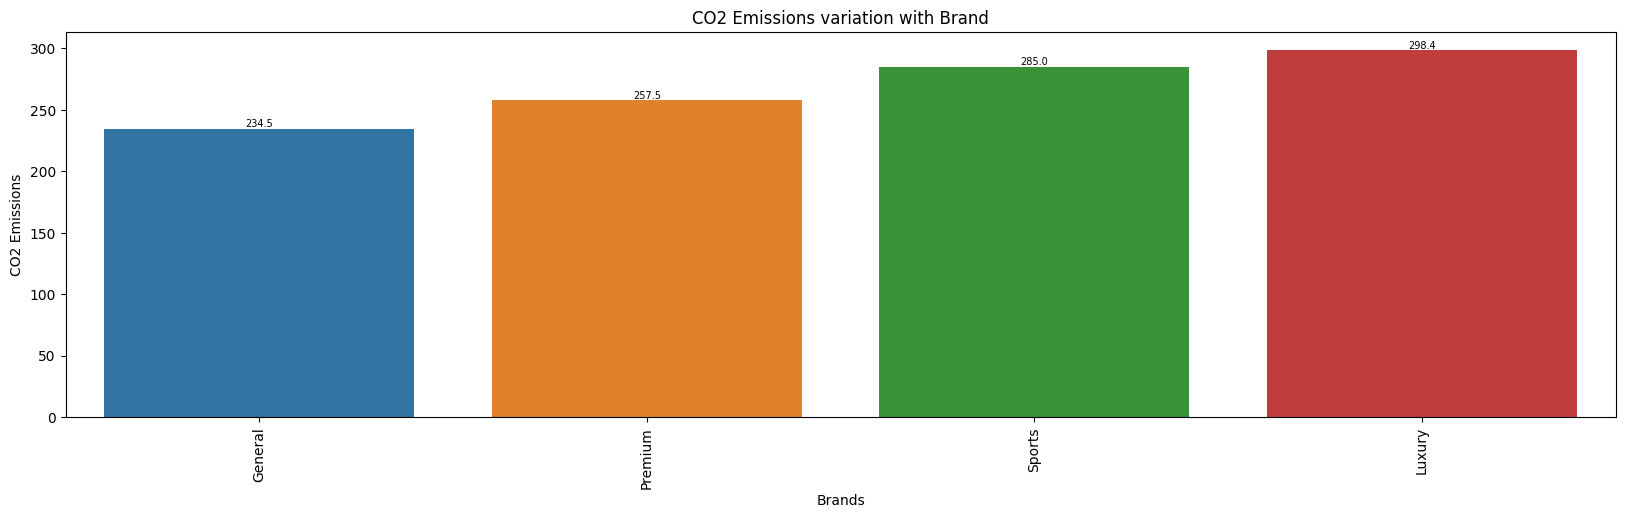

In [34]:
plt.figure(figsize=(20,5))
figure8 = sns.barplot(data = df_co2_make, x = "make",  y= "co2_emissions")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Brand")
plt.xlabel("Brands")
plt.ylabel("CO2 Emissions")
plt.bar_label(figure8.containers[0], fontsize=7, fmt='%.1f')
plt.show()

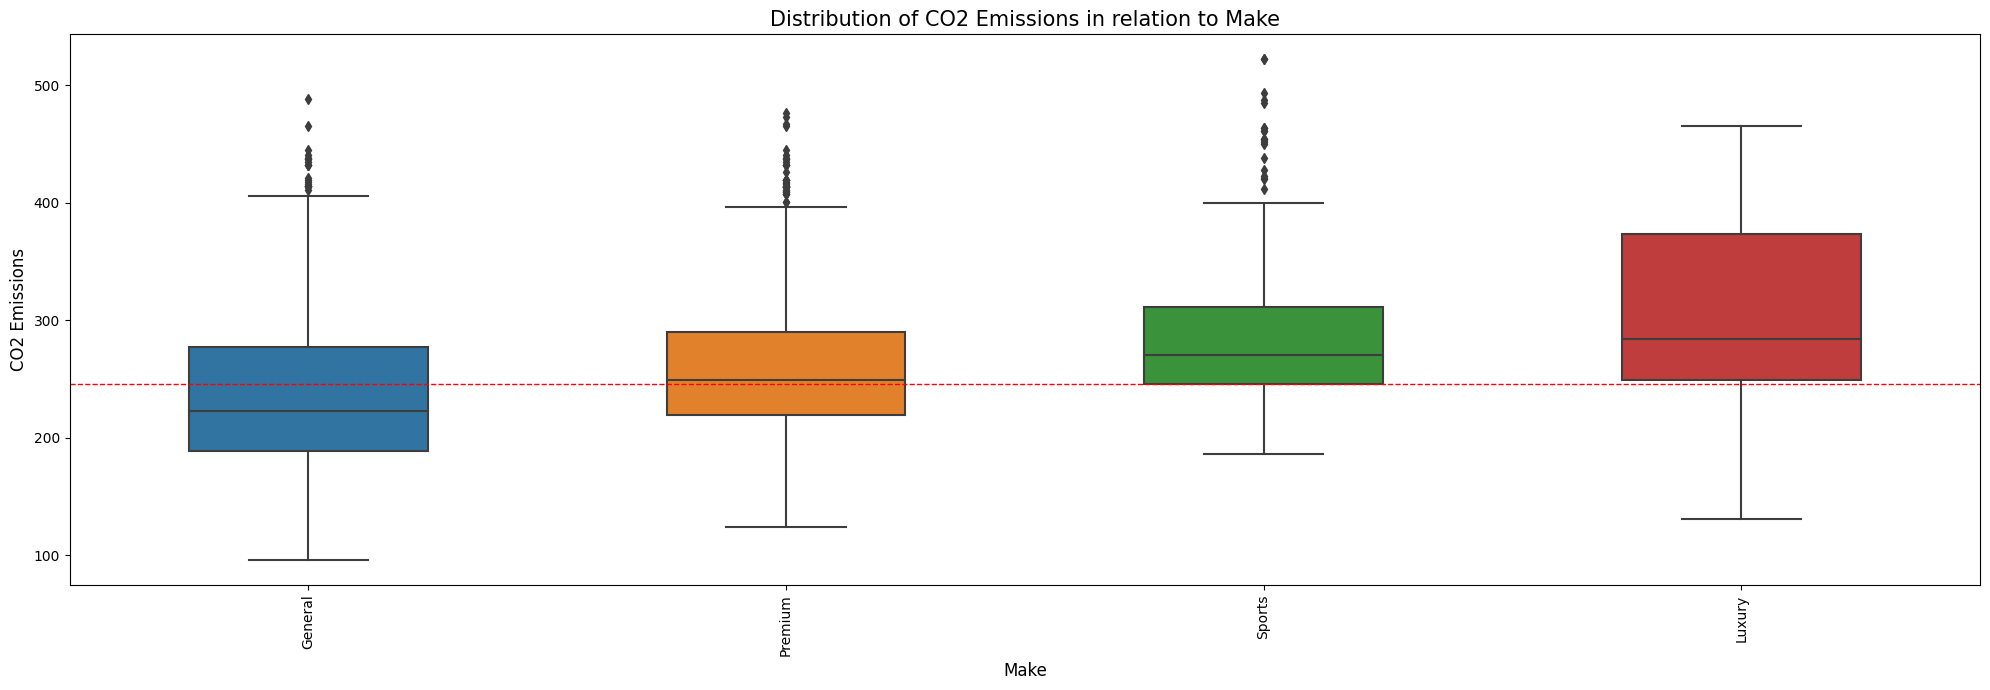

In [35]:
plt.figure(figsize=(20,7))
order = df.groupby("make")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="make", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Make", fontsize=12)
plt.ylabel("CO2 Emissions", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

1. From both the bar graph and the box plot it can be inferred that average CO2 emissions of cars belonging to the Luxury is the highest and cars of General has the lowest emissions.
2. The red line signify the sample mean of CO2 emissions.
3. Almost 50% of the brand has their median CO2 emissions less than the sample median of CO2 emissions by all the cars.

CO2 Emissions variation with Vehicle Class

In [36]:
df_co2_vehicle_class = df.groupby(['vehicle_class'])['co2_emissions'].mean().sort_values().reset_index()

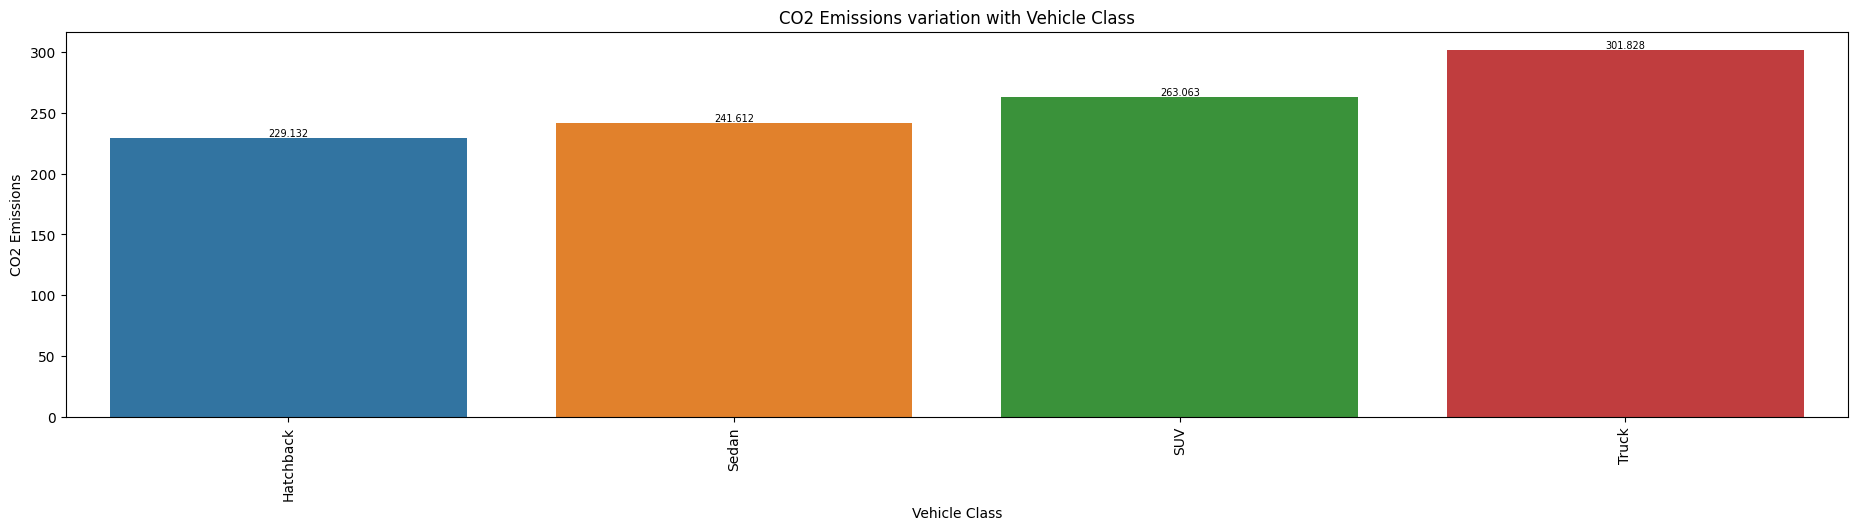

In [37]:


plt.figure(figsize=(23,5))
figure9 = sns.barplot(data = df_co2_vehicle_class, x = "vehicle_class",  y= "co2_emissions")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("CO2 Emissions")
plt.bar_label(figure9.containers[0], fontsize=7)
plt.show()

In [38]:
# vehicle class of Truck has high variation in co2 emissions

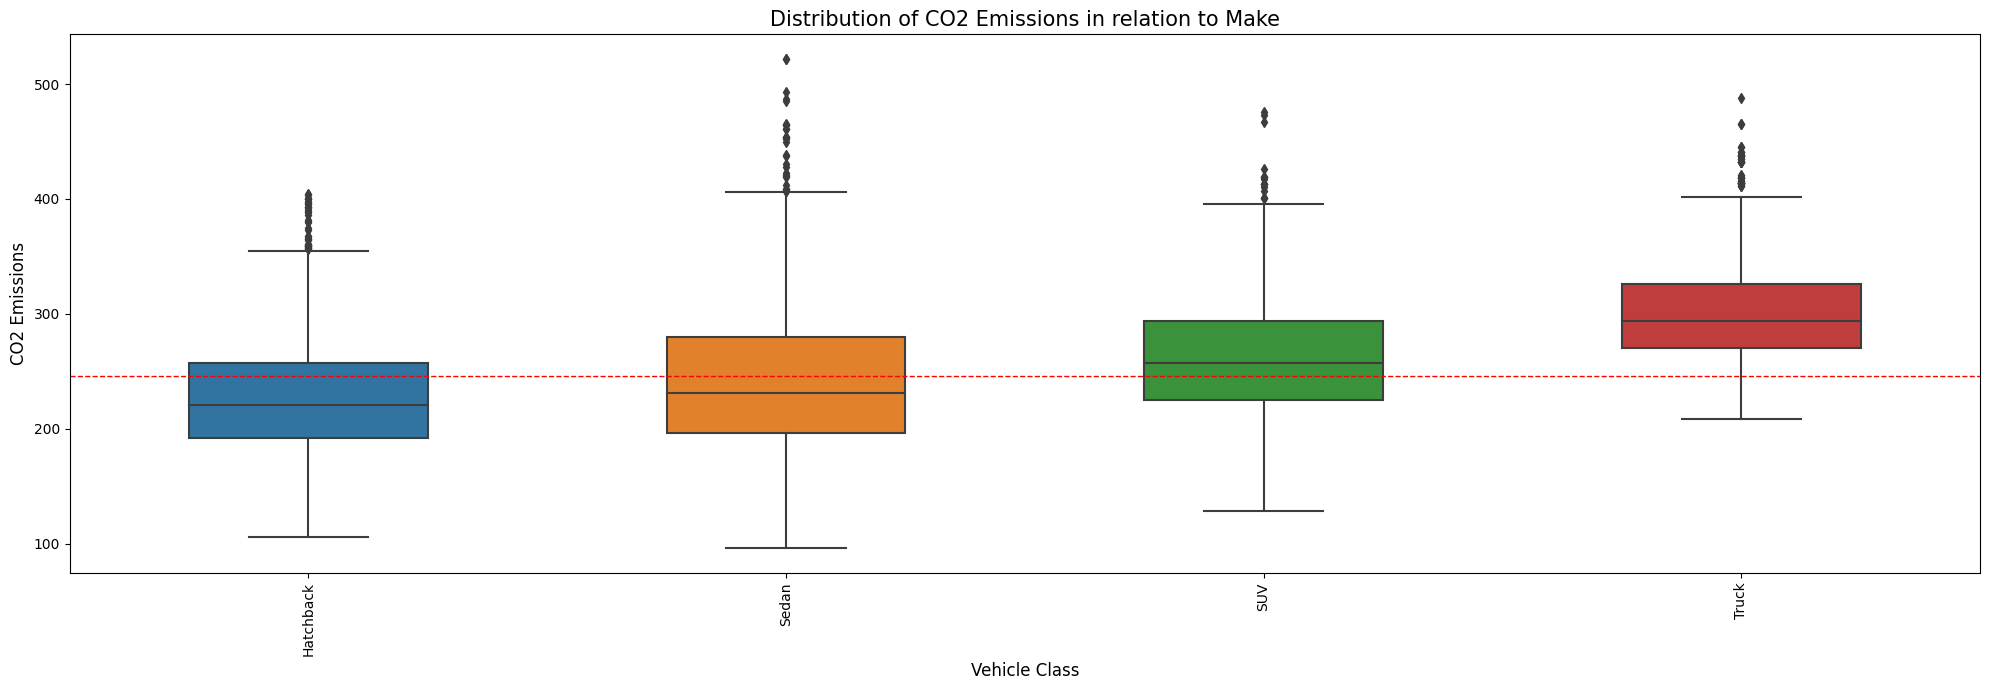

In [39]:
plt.figure(figsize=(20,7))
order = df.groupby("vehicle_class")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="vehicle_class", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Vehicle Class", fontsize=12)
plt.ylabel("CO2 Emissions", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

1. The vehicle of class VAN-Passenger followed by Truck has the highest CO2 emissions among all. And Hatchback has the lowest CO2 emissions.
2. There are 8 types of vehicle class out of 16 which has a median CO2 emissions less than sample median of CO2 emissions and the other 8 has a higher median.

CO2 Emissions variation with Transmission

In [40]:
df_co2_transmission = df.groupby(['transmission'])['co2_emissions'].mean().sort_values().reset_index()

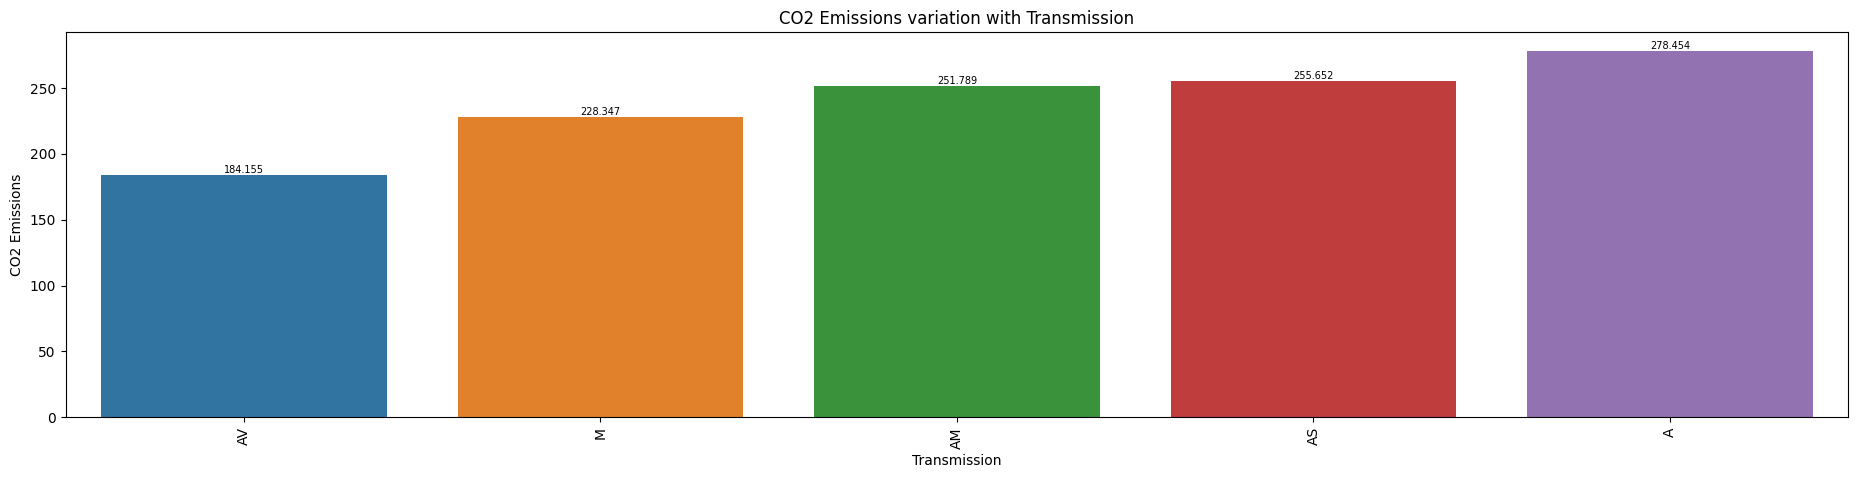

In [41]:

plt.figure(figsize=(23,5))
figure10 = sns.barplot(data = df_co2_transmission, x = "transmission",  y= "co2_emissions")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Transmission")
plt.xlabel("Transmission")
plt.ylabel("CO2 Emissions")
plt.bar_label(figure10.containers[0], fontsize=7)
plt.show()

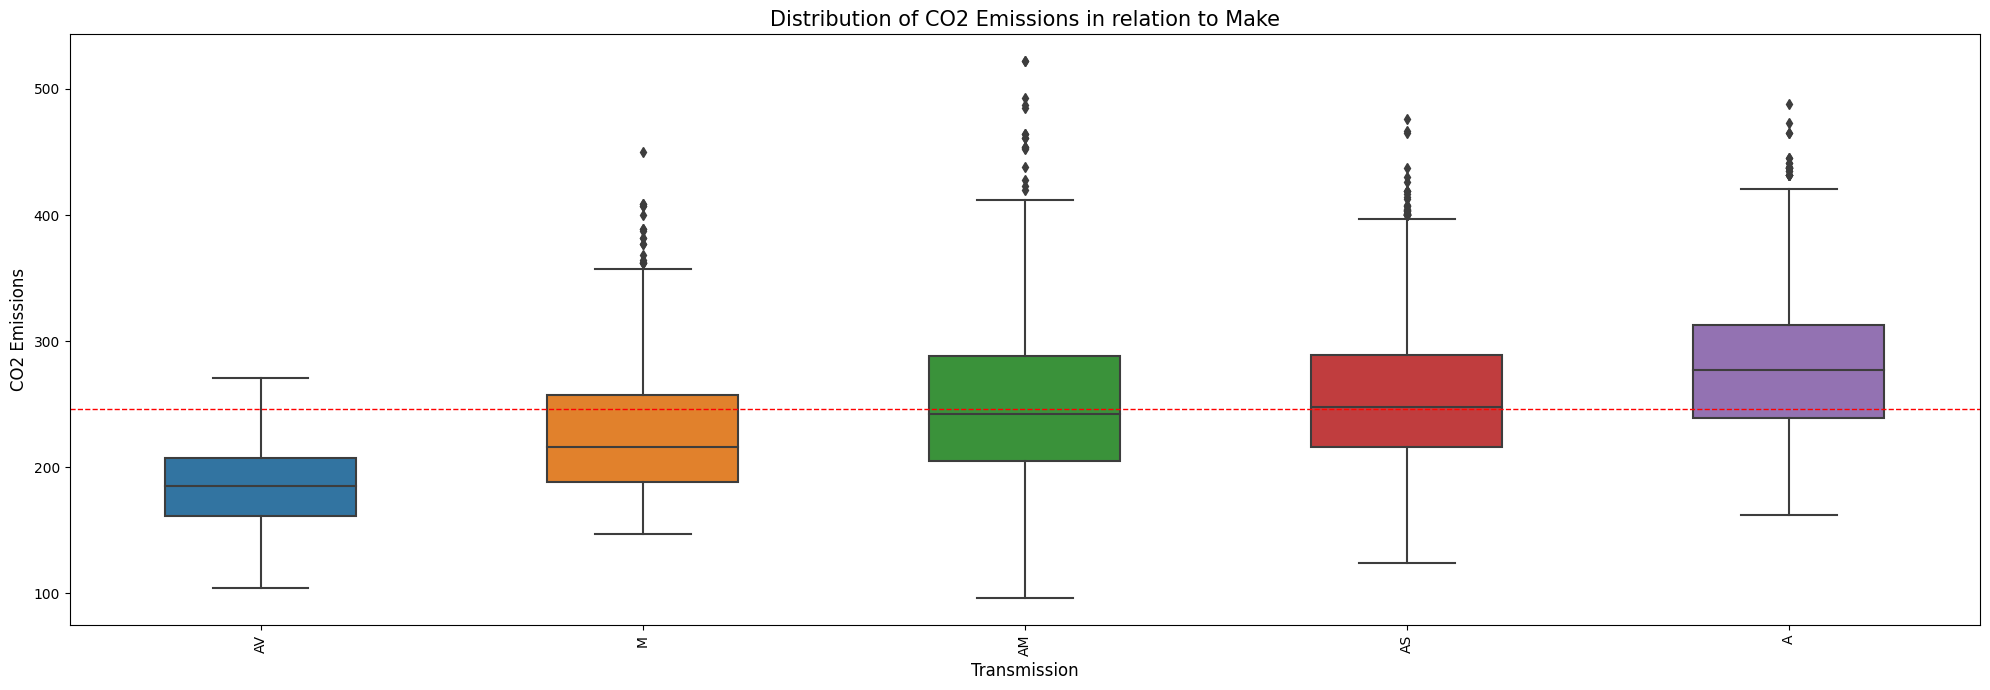

In [42]:
plt.figure(figsize=(20,7))
order = df.groupby("transmission")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="transmission", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Transmission", fontsize=12)
plt.ylabel("CO2 Emissions", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

1) Vehicles with Automatic transmission exhibit highest CO2 emissions and vehicle with Continuously Variable Transmission shows the lowest CO2 emissions.

2) Median CO2 emissions of Automated Manual(AM) and Automatic(A) with Select Shift vehicles is almost similar to that of sample median CO2 emissions.


CO2 Emissions variation with Fuel Type

In [43]:
df_co2_fuel_type = df.groupby(['fuel_type'])['co2_emissions'].mean().sort_values().reset_index()

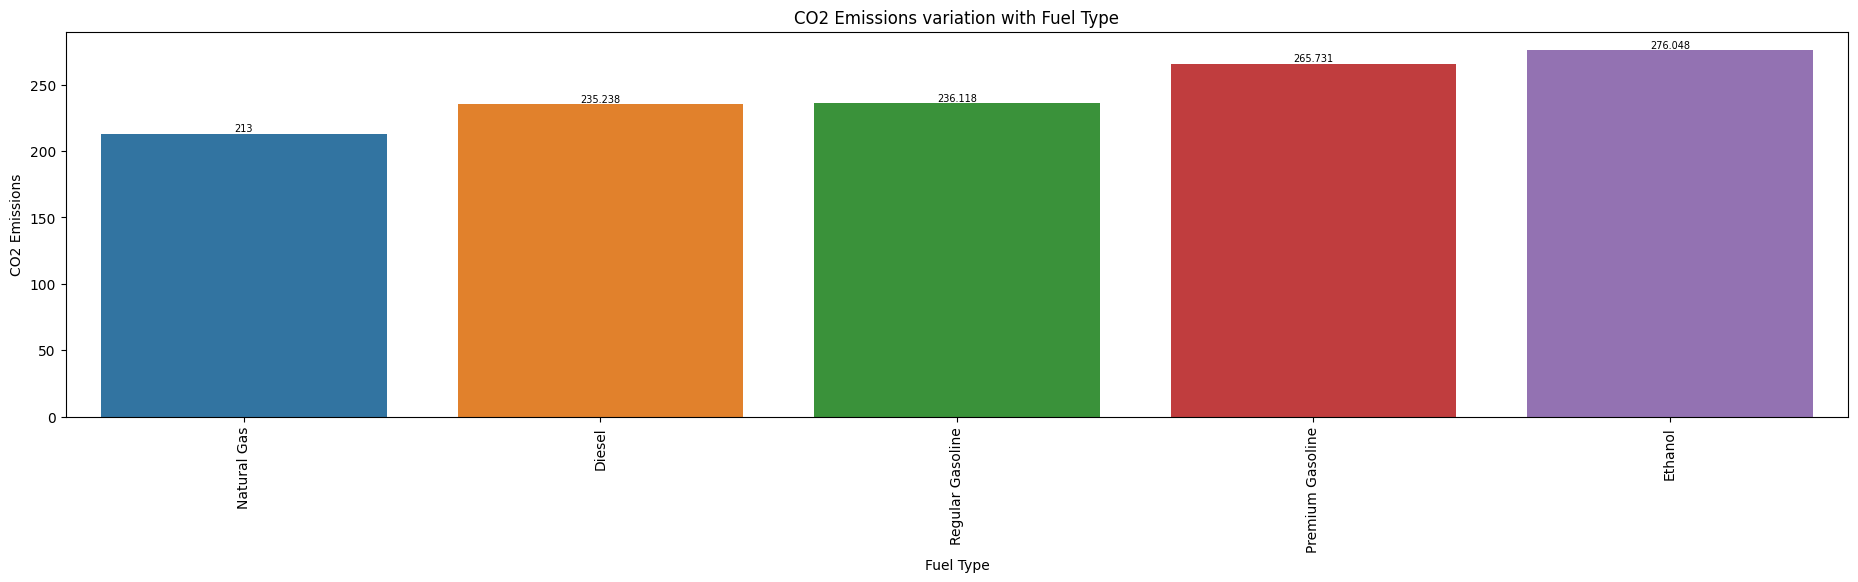

In [44]:
plt.figure(figsize=(23,5))
figure11 = sns.barplot(data = df_co2_fuel_type, x = "fuel_type",  y= "co2_emissions")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("CO2 Emissions")
plt.bar_label(figure11.containers[0], fontsize=7)
plt.show()

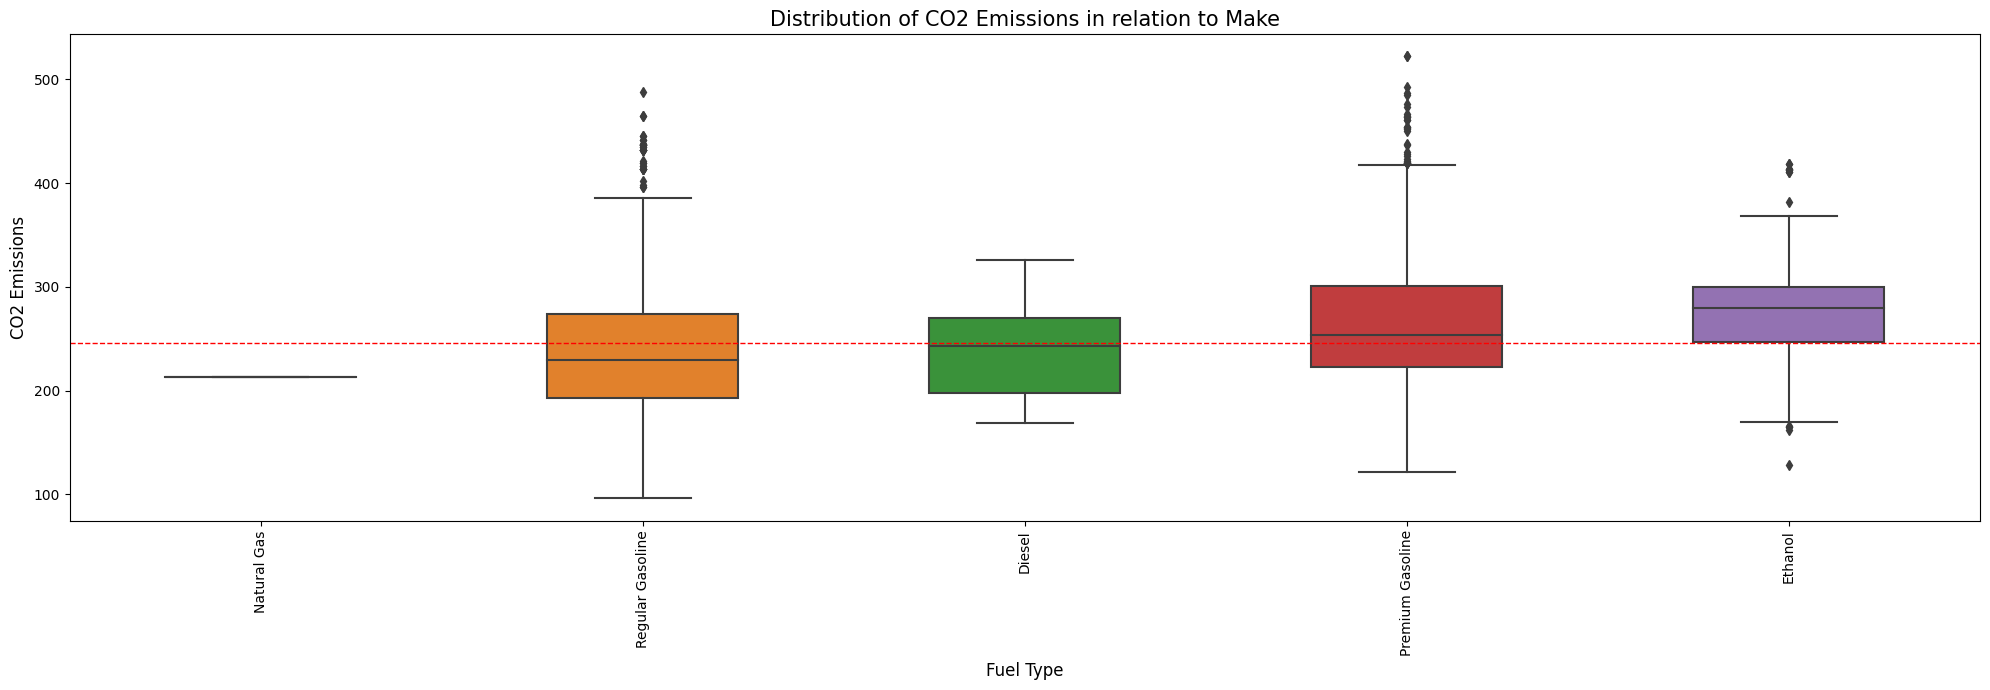

In [45]:
plt.figure(figsize=(20,7))
order = df.groupby("fuel_type")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="fuel_type", y="co2_emissions", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("CO2 Emissions", fontsize=12)
plt.axhline(df["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

1) Cars running on Ethanol has the highest CO2 emissions with almost all the values hisger than the sample median CO2 emissions.

2)Natural Gas has the lowest CO2 emissions, but there is only one vehicle that use it as fuel. Other than that Regular Gasoline has the lowest CO2 emissions with almost 75% values less than sample median.

3)The median CO2 emissions of fuel type Premiuim Gasoline and Diesel has almost similar median to that of the sample median.

DATA CLEANING

In [46]:
df.skew()

engine_size                       0.810963
cylinders                         1.106651
fuel_consumption_city             0.841856
fuel_consumption_hwy              1.110217
fuel_consumption_comb(l/100km)    0.926410
fuel_consumption_comb(mpg)        0.915277
co2_emissions                     0.558865
dtype: float64

1. Cylinder feature has discrete values so it is the most positively skewes distribution.
2. CO2 Emission in turn is the one which looks more similar to a normally distributed curve than the others.

In [47]:
# checking the correlation
df.corr().T

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
engine_size,1.000000,0.928796,0.834325,0.766700,0.820183,-0.764060,0.854999
cylinders,0.928796,1.000000,0.801180,0.717321,0.780932,-0.724347,0.834697
fuel_consumption_city,0.834325,0.801180,1.000000,0.950733,0.994040,-0.927901,0.918528
fuel_consumption_hwy,0.766700,0.717321,0.950733,1.000000,0.978578,-0.892238,0.883153
fuel_consumption_comb(l/100km),0.820183,0.780932,0.994040,0.978578,1.000000,-0.926110,0.916611
fuel_consumption_comb(mpg),-0.764060,-0.724347,-0.927901,-0.892238,-0.926110,1.000000,-0.906839
co2_emissions,0.854999,0.834697,0.918528,0.883153,0.916611,-0.906839,1.000000


In [48]:
# check the correlation
df.corr()['co2_emissions'].sort_values()

fuel_consumption_comb(mpg)       -0.906839
cylinders                         0.834697
engine_size                       0.854999
fuel_consumption_hwy              0.883153
fuel_consumption_comb(l/100km)    0.916611
fuel_consumption_city             0.918528
co2_emissions                     1.000000
Name: co2_emissions, dtype: float64

1) fuel consumption comb is negatively correlated with co2 emissions.


2) And others features are positively correlated with co2 emissions.

3) fuel consumption comb(1/100km) is highly correlated with co2.

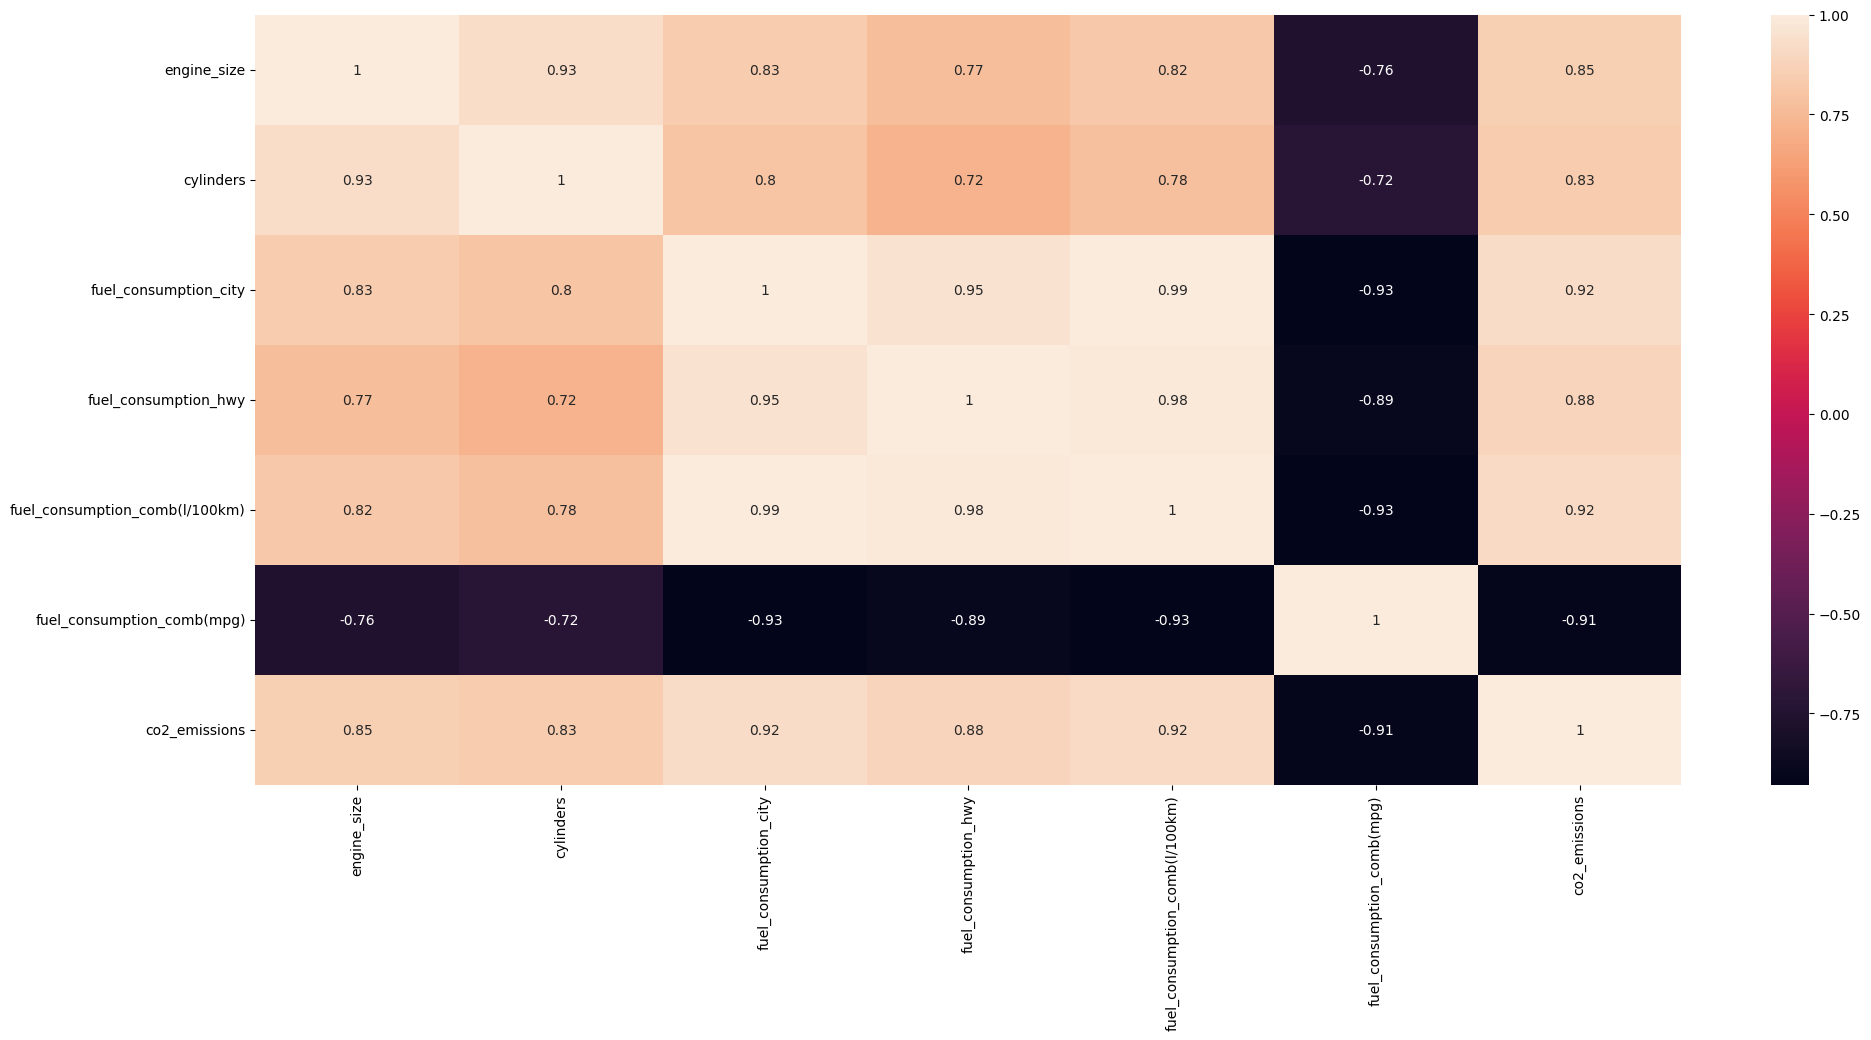

In [49]:
plt.figure(figsize = (23,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [50]:
df.count()

make                              6273
model                             6273
vehicle_class                     6273
engine_size                       6273
cylinders                         6273
transmission                      6273
fuel_type                         6273
fuel_consumption_city             6273
fuel_consumption_hwy              6273
fuel_consumption_comb(l/100km)    6273
fuel_consumption_comb(mpg)        6273
co2_emissions                     6273
dtype: int64

With the help of the counts we can check that cols have equal numbers rows or not

In this data the cols have equals numbers of rows

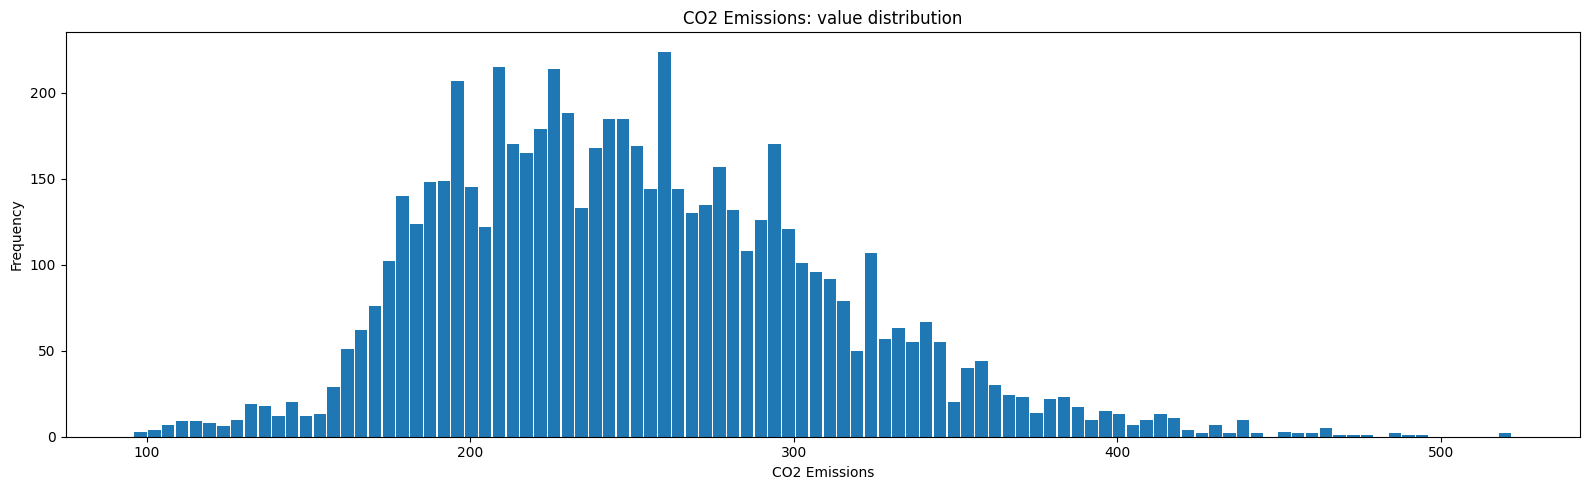

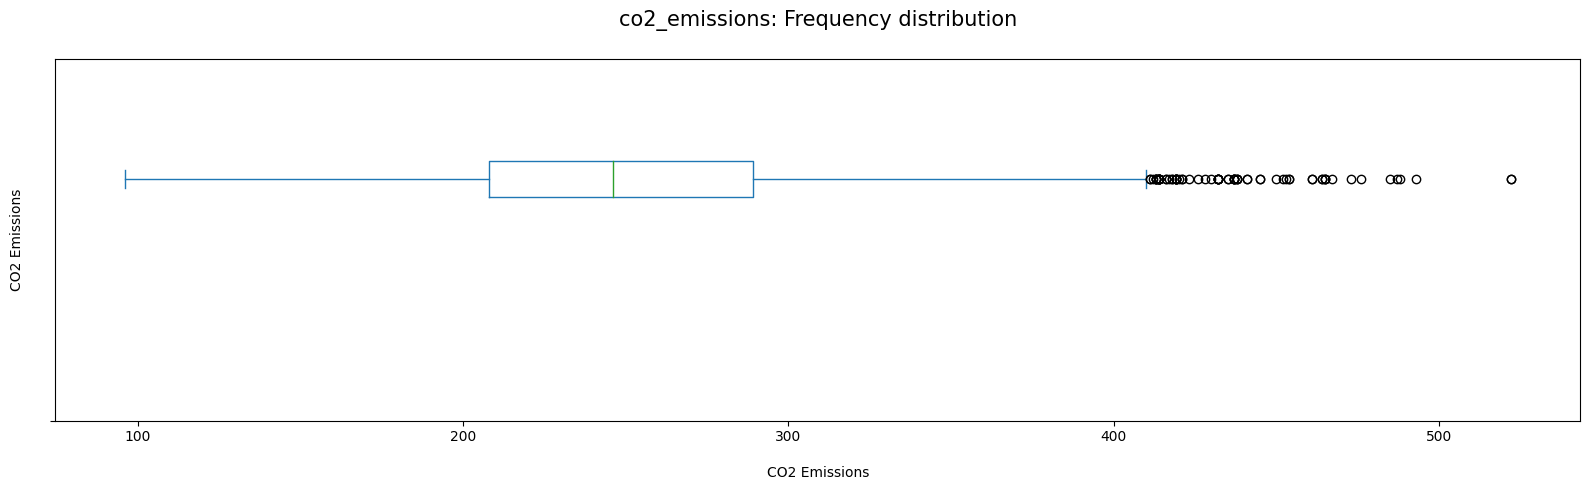

In [51]:
# checking the outliers in co2 emissions with the help of histogram and boxplot.
plt.figure(figsize=(16,5))
df["co2_emissions"].plot(kind="hist", bins=100, rwidth=0.9)
plt.title("CO2 Emissions: value distribution")
plt.xlabel("CO2 Emissions")
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,5))
df["co2_emissions"].plot(kind="box", vert=False)
plt.title("co2_emissions: Frequency distribution\n", fontsize=15)
plt.xlabel("\nCO2 Emissions")
plt.yticks([0], [''])
plt.ylabel("CO2 Emissions\n", rotation=90)
plt.tight_layout()
plt.show()

1. The minimum vale of the CO2 emission is around 96.
2. The median CO2 emission is 246.
3. The 25% of the samples have CO2 emission between 96 and 208.
4. The 75% of the samples have CO2 emission between 96 and 288.
5. There are no outliers in the lower half but there are outliers in the upper half.
6. The maximum CO2 emissions observed is 522 which is an outliers
7. The distribution of CO2 emissions is positively skewed

In [52]:
# outliers
#Outliers numeric features

df1=df.select_dtypes(include=np.number)
#Identifying outliers using IQR

Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

engine_size                        1.7
cylinders                          2.0
fuel_consumption_city              4.6
fuel_consumption_hwy               2.8
fuel_consumption_comb(l/100km)     3.8
fuel_consumption_comb(mpg)        10.0
co2_emissions                     81.0
dtype: float64


In [53]:
outlier = pd.DataFrame((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR)))

for i in outlier.columns:
    print('Total number of Outliers in column {} are {}'.format(i, (len(outlier[outlier[i] == True][i]))))

Total number of Outliers in column engine_size are 121
Total number of Outliers in column cylinders are 177
Total number of Outliers in column fuel_consumption_city are 116
Total number of Outliers in column fuel_consumption_hwy are 150
Total number of Outliers in column fuel_consumption_comb(l/100km) are 115
Total number of Outliers in column fuel_consumption_comb(mpg) are 93
Total number of Outliers in column co2_emissions are 74


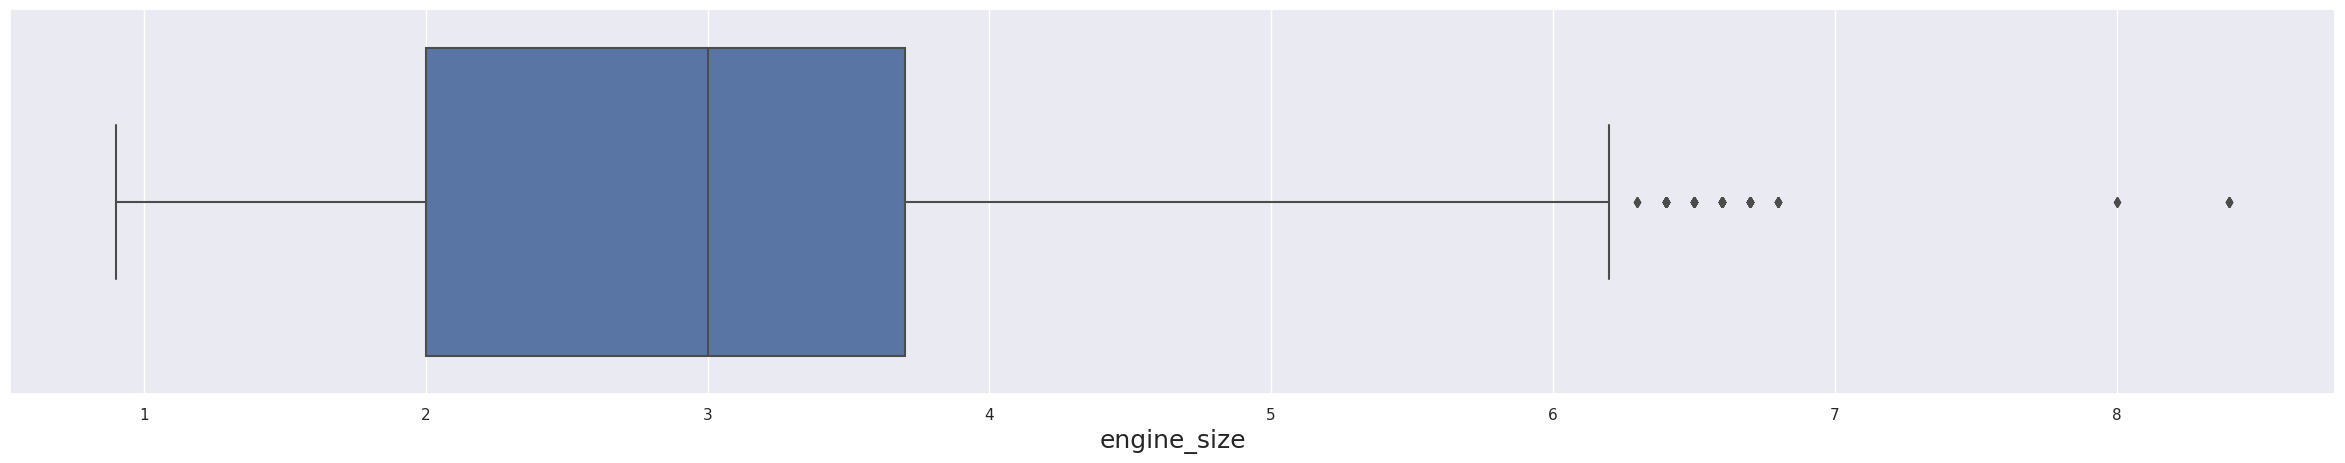

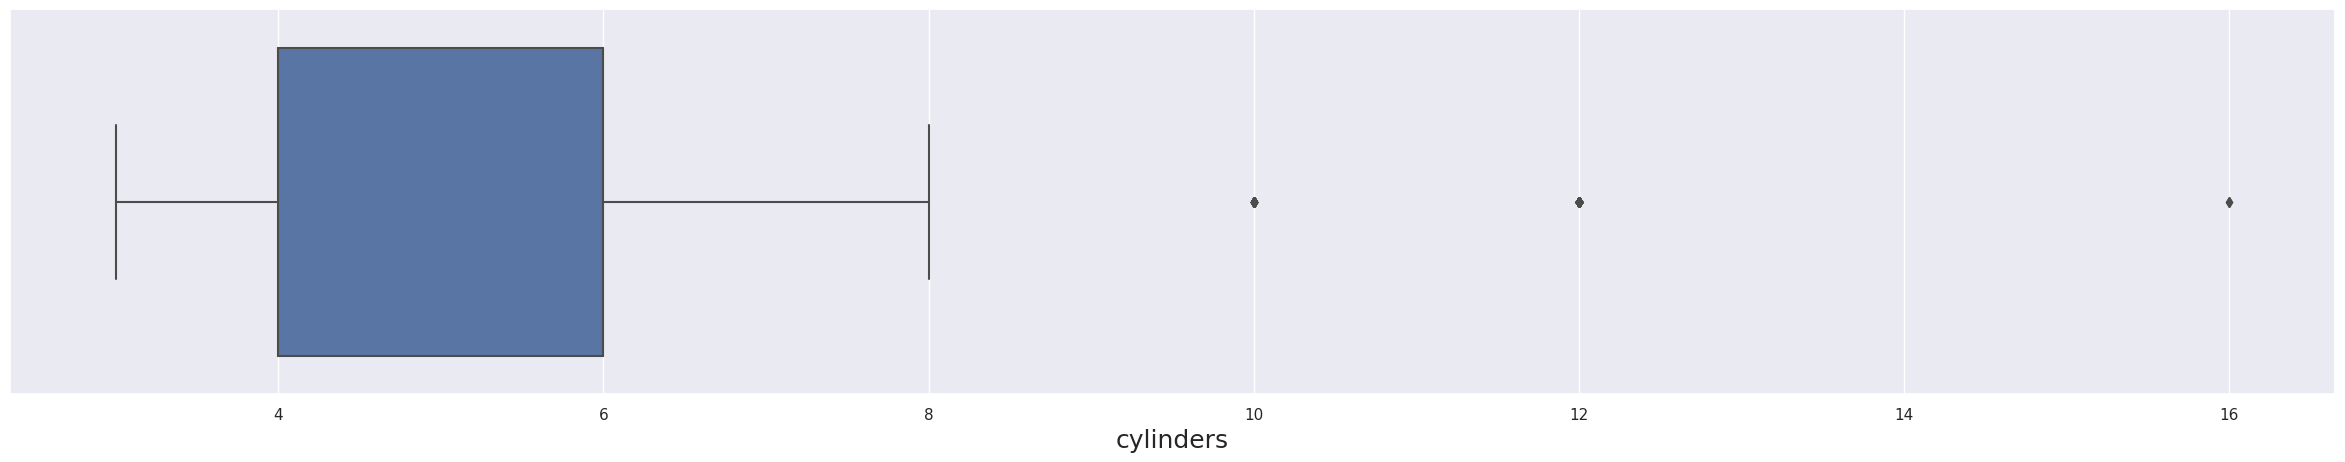

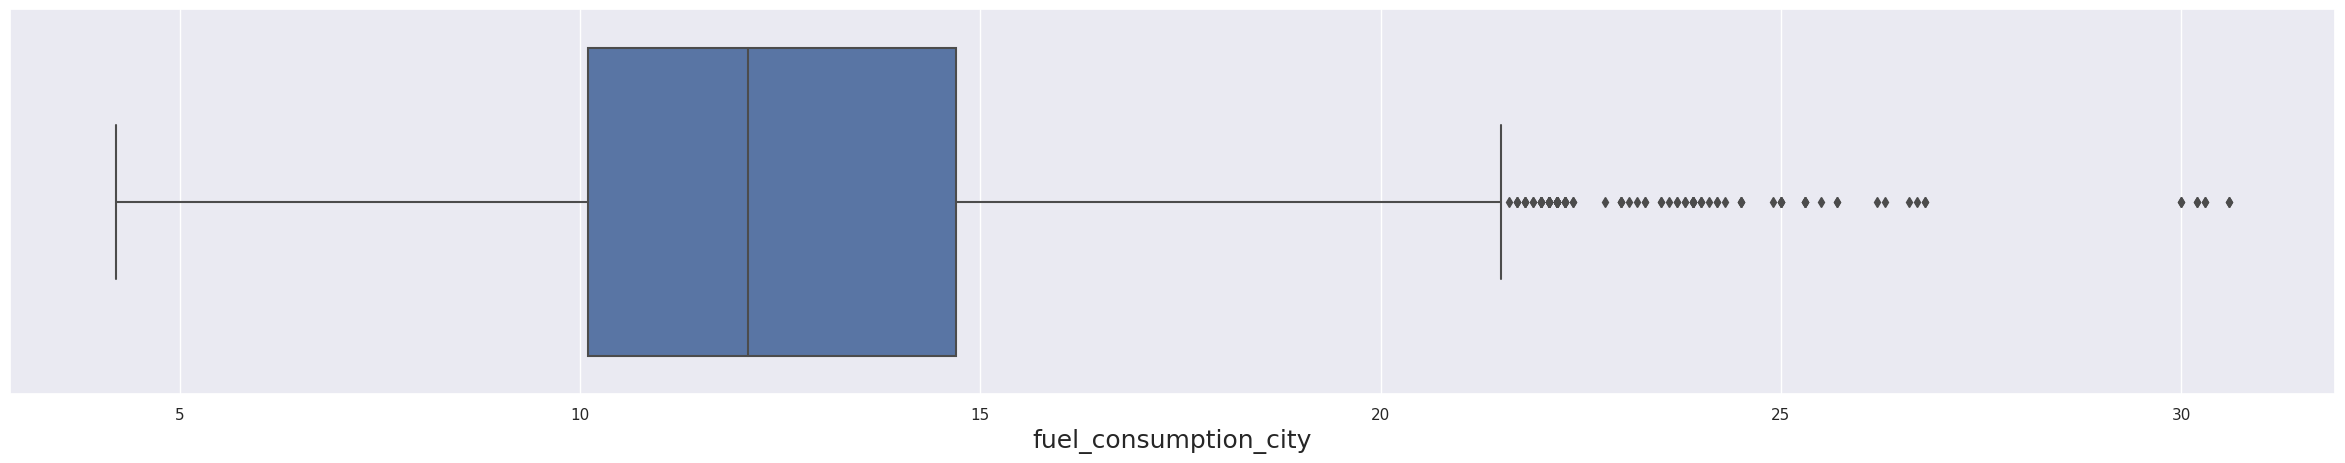

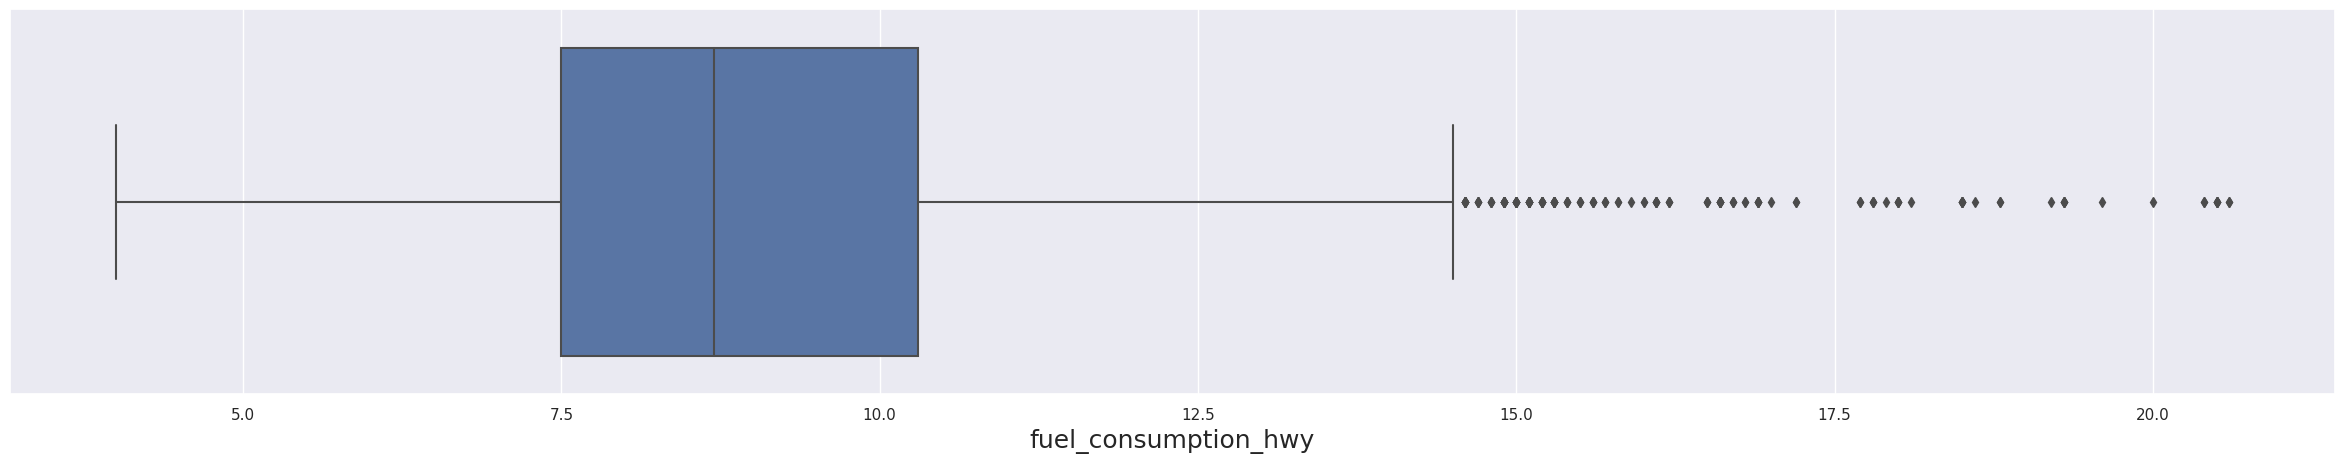

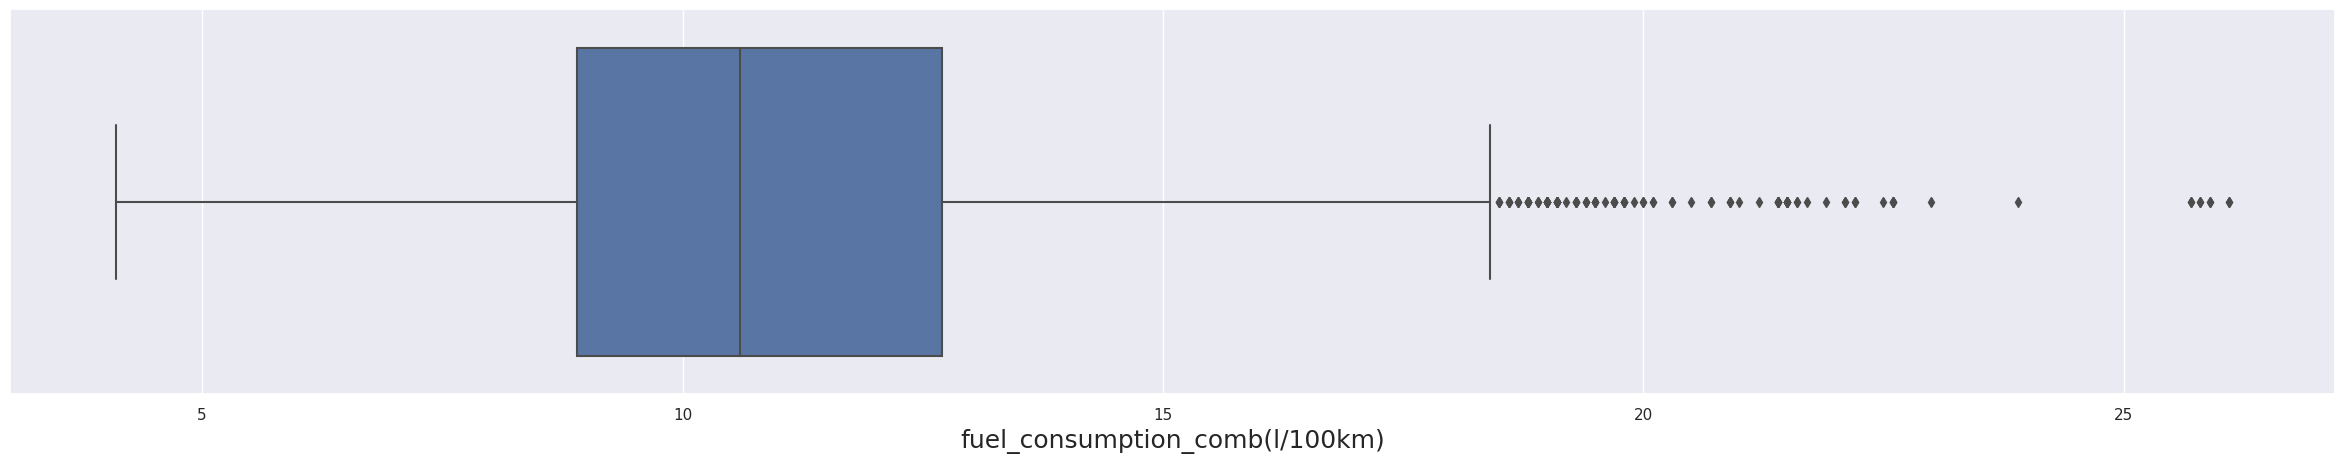

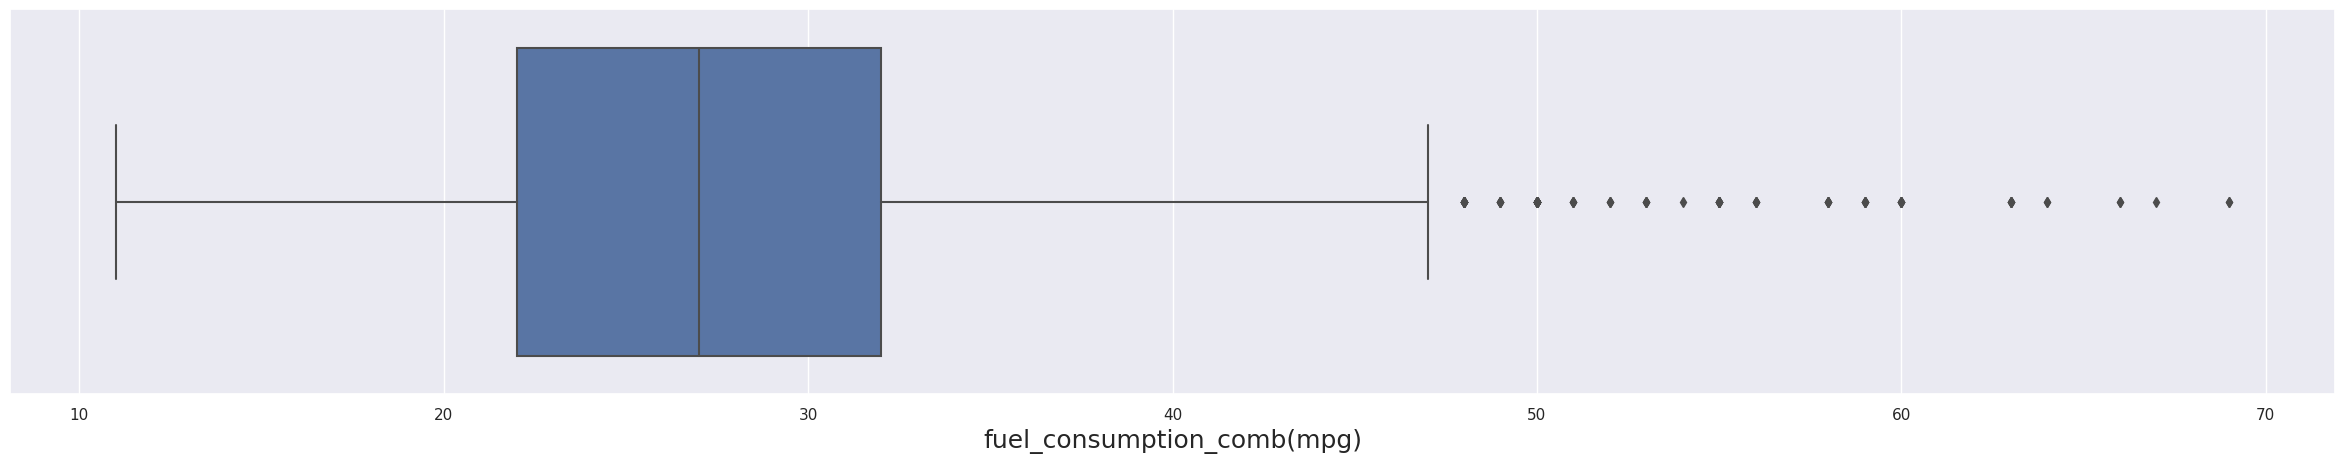

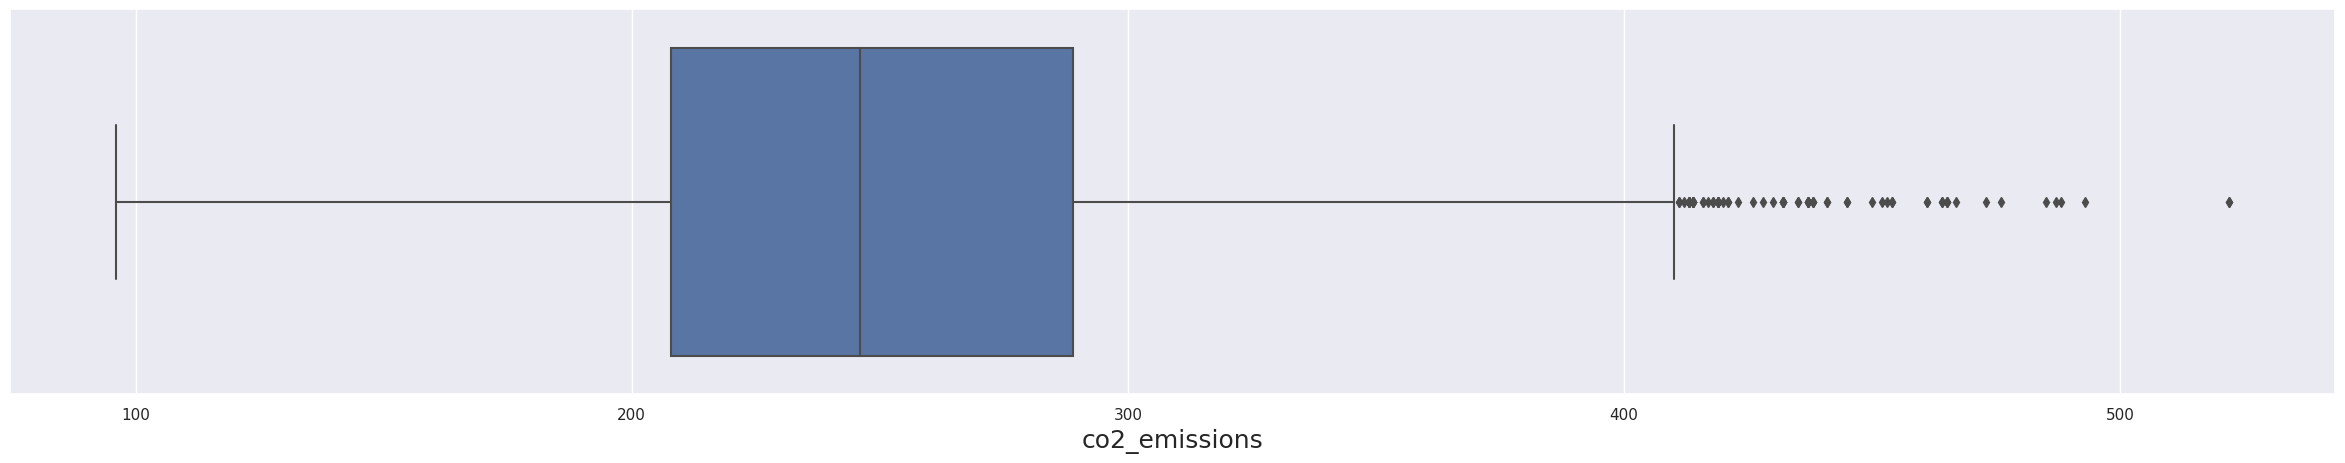

In [54]:
for column in enumerate(df1):
    plt.figure(figsize=(30,5))
    sns.set_theme(style="darkgrid")
    sns.boxplot(x=column[1], data=  df1)
    plt.xlabel(column[1],fontsize=18)
    plt.show()

In [55]:
#Checking the normality of numeric features
from scipy.stats import shapiro
stat, p_value = shapiro(df1)

print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.5184566378593445
P-Value: 0.0


Since the numeric features are not normal we are removing the outliers using IQR method

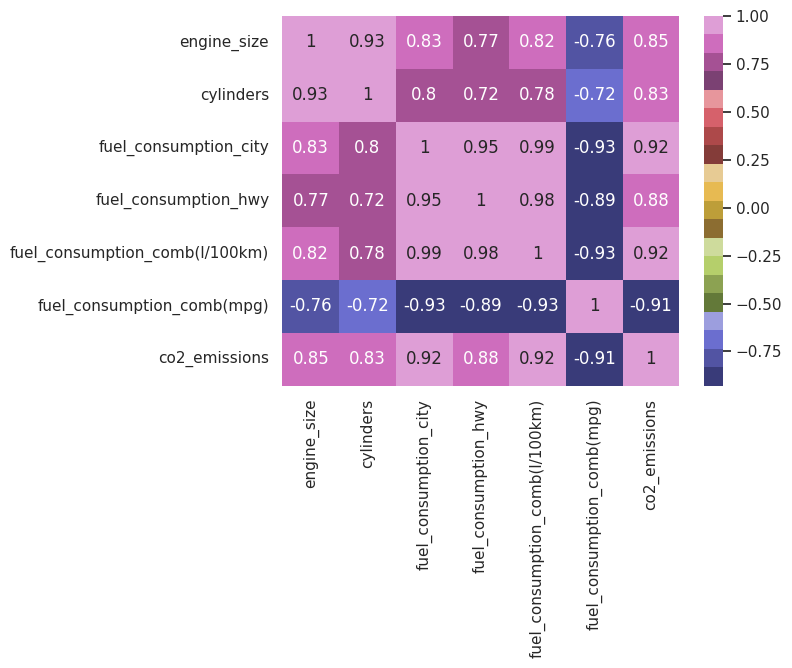

In [56]:
df1 = df.select_dtypes(include=np.number)

corr =  df1.corr()

corr =df1.corr(method='pearson')
sns.heatmap(corr, annot=True,cmap='tab20b')
plt.show()

In [57]:
# #encoding

# # Assuming df is your DataFrame
df_dummies = pd.get_dummies(data=df[["fuel_type", "transmission", "make", "vehicle_class"]], drop_first=True)

# # Assuming df is your original DataFrame
df_num_features = df.select_dtypes(include=np.number)

df = pd.concat([df_num_features, df_dummies], axis=1)

In [58]:
imp=df.corr()
imp_cols = imp[abs(imp['co2_emissions']) > 0.5].index.tolist()
imp_cols


['engine_size',
 'cylinders',
 'fuel_consumption_city',
 'fuel_consumption_hwy',
 'fuel_consumption_comb(l/100km)',
 'fuel_consumption_comb(mpg)',
 'co2_emissions']

In [59]:
# This are cols are imp because there are highly correlated with co2

In [60]:
# renaming the cols
df.rename(columns={'make': 'Make','model':'Model', 'vehicle_class': 'Vehicles_Class', 'engine_size': 'Engine_Size', 'transmission':'Transmission',
                    'cylinders': 'Cylinders', 'fuel_type': 'Fuel_Type', 'fuel_consumption_city': 'Fuel_Consumption_City',
                   'fuel_consumption_hwy': 'Fuel_Consumption_hwy', 'fuel_consumption_comb(l/100km)': 'Fuel_Consumption_Comb1',
                   'fuel_consumption_comb(mpg)': 'Fuel_Consumption_Comb2', 'co2_emissions': 'CO2_Emissions'},
          inplace=True)
df.head()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_hwy,Fuel_Consumption_Comb1,Fuel_Consumption_Comb2,CO2_Emissions,fuel_type_Ethanol,fuel_type_Natural Gas,fuel_type_Premium Gasoline,...,transmission_AM,transmission_AS,transmission_AV,transmission_M,make_Luxury,make_Premium,make_Sports,vehicle_class_SUV,vehicle_class_Sedan,vehicle_class_Truck
0,2.0,4,9.9,6.7,8.5,33,196,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1,2.4,4,11.2,7.7,9.6,29,221,0,0,1,...,0,0,0,1,1,0,0,0,0,0
2,1.5,4,6.0,5.8,5.9,48,136,0,0,1,...,0,0,1,0,1,0,0,0,0,0
3,3.5,6,12.7,9.1,11.1,25,255,0,0,1,...,0,1,0,0,1,0,0,1,0,0
4,3.5,6,12.1,8.7,10.6,27,244,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [61]:
df.columns

Index(['Engine_Size', 'Cylinders', 'Fuel_Consumption_City',
       'Fuel_Consumption_hwy', 'Fuel_Consumption_Comb1',
       'Fuel_Consumption_Comb2', 'CO2_Emissions', 'fuel_type_Ethanol',
       'fuel_type_Natural Gas', 'fuel_type_Premium Gasoline',
       'fuel_type_Regular Gasoline', 'transmission_AM', 'transmission_AS',
       'transmission_AV', 'transmission_M', 'make_Luxury', 'make_Premium',
       'make_Sports', 'vehicle_class_SUV', 'vehicle_class_Sedan',
       'vehicle_class_Truck'],
      dtype='object')

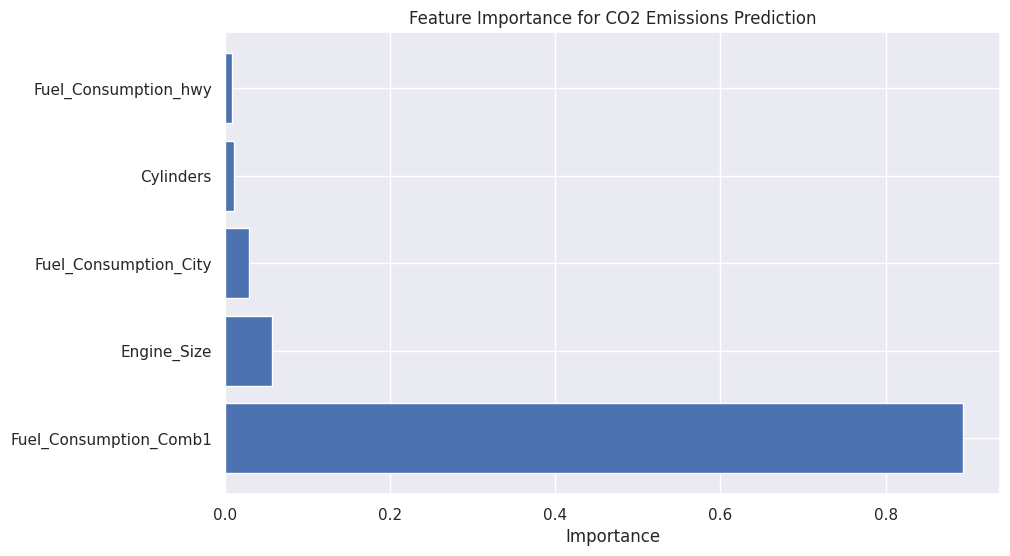

In [62]:
# for features select using randomforest regression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the specified columns
X = df[['Engine_Size', 'Cylinders', 'Fuel_Consumption_City',
          'Fuel_Consumption_hwy', 'Fuel_Consumption_Comb1']]

y = df['CO2_Emissions']  # Corrected the DataFrame name to df1

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance for CO2 Emissions Prediction')
plt.show()



In [63]:
df1=df[['Engine_Size','Cylinders','Fuel_Consumption_Comb1','CO2_Emissions']]

df1

,Engine_Size,Cylinders,Fuel_Consumption_Comb1,CO2_Emissions
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
6268,2.0,4,9.4,219
6269,2.0,4,9.9,232
6270,2.0,4,10.3,240
6271,2.0,4,9.9,232


In [64]:
# #Feature Scaling
import statsmodels
from scipy import stats
for col in df_num_features.columns:
    print("Column ", col, " :", stats.shapiro(df_num_features[col]))

Column  engine_size  : ShapiroResult(statistic=0.9172296524047852, pvalue=0.0)
Column  cylinders  : ShapiroResult(statistic=0.8065890073776245, pvalue=0.0)
Column  fuel_consumption_city  : ShapiroResult(statistic=0.9611993432044983, pvalue=5.532210309641532e-38)
Column  fuel_consumption_hwy  : ShapiroResult(statistic=0.9394264221191406, pvalue=7.006492321624085e-45)
Column  fuel_consumption_comb(l/100km)  : ShapiroResult(statistic=0.9552490711212158, pvalue=3.9733117306698026e-40)
Column  fuel_consumption_comb(mpg)  : ShapiroResult(statistic=0.9586442112922668, pvalue=6.197630618151121e-39)
Column  co2_emissions  : ShapiroResult(statistic=0.9814020395278931, pvalue=6.602647332008289e-28)


Since the numerical features are normally distributed (p-value<0.05) , we will perform Min-Max normalisation to scale the data

Normalization

The formula for Min-Max Scaling

Normalisation=X-X(min)/X(max)-X(min)

1)X is the original value of the feature.

2)X(min) is the minimum value of the feature.

3)X(max) is the maximum value of the feature

In [65]:
##Normalization
X = df1.drop(['CO2_Emissions'], axis= 1).astype(np.float32)
y = df1["CO2_Emissions"].astype(np.float32)
# Normalize
X = (X - np.min(X)) / (np.max(X) - np.min(X))
X["Engine_Size"]=X["Engine_Size"].map(lambda x:round(x,2))
X["Cylinders"]=X["Cylinders"].map(lambda x:round(x,2))
X["Fuel_Consumption_Comb1"]=X["Fuel_Consumption_Comb1"].map(lambda x:round(x,2))
X

,Engine_Size,Cylinders,Fuel_Consumption_Comb1
0,0.15,0.08,0.20
1,0.20,0.08,0.25
2,0.08,0.08,0.08
3,0.35,0.23,0.32
4,0.35,0.23,0.30
...,...,...,...
6268,0.15,0.08,0.24
6269,0.15,0.08,0.26
6270,0.15,0.08,0.28
6271,0.15,0.08,0.26


In [66]:
# Model Building

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (4391, 3)
y_train (4391,)
X_test (1882, 3)
y_test (1882,)


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X = df[['Engine_Size','Cylinders','Fuel_Consumption_Comb1']]
y = df['CO2_Emissions']

# Create a linear regression model
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Fit the model to the entire dataset
model.fit(X, y)

# Make predictions on the entire dataset
y_pred = model.predict(X)

# Calculate R-squared value
r2_squared1 = r2_score(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse_value = mean_squared_error(y, y_pred)

# Print the results
print("Cross-Validation R-squared Scores for each fold:", cv_scores)
print("Mean R-squared across all folds:", np.mean(cv_scores))
print("R-squared on the entire dataset:", r2_squared1)
print("Mean Squared Error (MSE) on the entire dataset:", mse_value)

Cross-Validation R-squared Scores for each fold: [0.84605936 0.84766282 0.88787597 0.89514585 0.89346359]
Mean R-squared across all folds: 0.8740415195716936
R-squared on the entire dataset: 0.8784685259465617
Mean Squared Error (MSE) on the entire dataset: 426.3655694281561


In [69]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Split the data into features (X) and target variable (y)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive and calculate RMSE
rmse_cv = np.sqrt(-cv_scores)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_squared2 = r2_score(y_test, y_pred)

# Display the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2_squared2)
print("Cross-validated RMSE:", rmse_cv)

Coefficients: [ 5.44645024  6.71669673 13.13391142]
Intercept: 51.5710948421073
Root Mean Squared Error (RMSE): 21.74860021511565
R-squared (R2): 0.8680416256883813
Cross-validated RMSE: [24.31281681 23.16936914 19.05142186 18.77268271 19.42808923]


In [70]:
from sklearn.tree import DecisionTreeRegressor
# Create a decision tree model
model = DecisionTreeRegressor()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Fit the model to the entire dataset
model.fit(X, y)

# Make predictions on the entire dataset
y_pred = model.predict(X)

# Calculate R-squared value
r2_squared4 = r2_score(y, y_pred)



# Print the results

print("Cross-Validation R-squared Scores for each fold:", cv_scores)
print("Mean R-squared across all folds:", np.mean(cv_scores))
print("R-squared on the entire dataset:", r2_squared4)

Cross-Validation R-squared Scores for each fold: [0.89611138 0.96694205 0.97570783 0.9776924  0.97690539]
Mean R-squared across all folds: 0.9586718077059239
R-squared on the entire dataset: 0.9891467491092979


In [71]:

from sklearn.ensemble import RandomForestRegressor
# Split the data into training and testing sets



# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative MSE scores to positive and calculate RMSE
rmse_cv = np.sqrt(-cv_scores)

# Fit the model to the training data
rf_model.fit(X_train, y_train)
# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_squared3 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2_squared3)
print("Cross-validated (RMSE):", rmse_cv)

Root Mean Squared Error (RMSE): 9.560778821924291
R-squared (R2): 0.9744987846298908
Cross-validated (RMSE): [17.41586669 10.83660841  8.47654147  8.37632386  8.83035325]


In [72]:

data = {
    'Model_Building': ['LinearRegression', 'Multiple Regression', 'RandomForestRegression', 'DecisionTreeRegression'],
    'R-Square': [r2_squared1, r2_squared2, r2_squared3, r2_squared4],
}

# Create a DataFrame
df2 = pd.DataFrame(data)

print(df2)

           Model_Building  R-Square
0        LinearRegression  0.878469
1     Multiple Regression  0.868042
2  RandomForestRegression  0.974499
3  DecisionTreeRegression  0.989147


In [73]:
import pickle
with open('random_forest_model.pkl', 'wb') as model_file:
     pickle.dump(rf_model, model_file)

A higher R-squared value indicates a better fit of the model to the data. In your case, the Decision Tree Regressor has the highest R-squared value (0.989147) and explains a larger proportion of the variance in the target variable.

In [75]:
from  pickle import dump
from pickle import load
import pickle

# Load the dataset
# df1 = pd.read_csv('co2_emissions.csv')
# df1.head(3)

# Assume your target variable is 'CO2_Emission' and other features are used for prediction
# Adjust the column names based on your actual dataset
#X = df.drop('CO2_Emissions', axis=1)  # Features
#y = df['CO2_Emissions']  # Target variable

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a Random Forest Regression model
#model = RandomForestRegressor(n_estimators=100, random_state=42)
#model.fit(X_train, y_train)

# # Save the trained model to a file
with open('random_forest_model.pkl', 'wb') as model_file:
     pickle.dump(rf_model, model_file)

# # Now, 'random_forest_model.pkl' contains your trained Random Forest model

# # Load the model from the file
with open('random_forest_model.pkl', 'rb') as model_file:
   loaded_model=pickle.load(model_file)

import joblib

# Save the model
joblib.dump(model, 'random_forest_model.pkl')

# Load the model
loaded_model = joblib.load('random_forest_model.pkl')

# Make predictions using the loaded model
# Assume you have a specific row of data for prediction (X_new)
# Adjust this based on your actual data
X_new = X_test.iloc[0:1, :]  # Example: Using the first row of the test set
prediction=loaded_model.predict(X_new)

print(f'Predicted CO2 Emission: {prediction[0]}')

Predicted CO2 Emission: 170.30769230769232




> Indented block

